## Importing Libraries

In [536]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score,precision_score,recall_score, accuracy_score,f1_score

In [537]:
employee_df = pd.read_csv('D:/Projects & Datasets/IBM_employee_attrition/dataset/HR-Employee-Attrition.csv')

In [538]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [539]:
employee_df.shape

(1470, 35)

In [540]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [541]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [542]:
#check column details- total values, unique values, null values

for i in employee_df.columns:
    print('Column_name: ',i)
    print('Column_type: ',employee_df[i].dtype)    
    print('Total_values: ',employee_df[i].count())
    print('Unique_value_counts: ',employee_df[i].nunique())
    print('Null_values: ',employee_df[i].isnull().sum())
    print('\n')

Column_name:  Age
Column_type:  int64
Total_values:  1470
Unique_value_counts:  43
Null_values:  0


Column_name:  Attrition
Column_type:  object
Total_values:  1470
Unique_value_counts:  2
Null_values:  0


Column_name:  BusinessTravel
Column_type:  object
Total_values:  1470
Unique_value_counts:  3
Null_values:  0


Column_name:  DailyRate
Column_type:  int64
Total_values:  1470
Unique_value_counts:  886
Null_values:  0


Column_name:  Department
Column_type:  object
Total_values:  1470
Unique_value_counts:  3
Null_values:  0


Column_name:  DistanceFromHome
Column_type:  int64
Total_values:  1470
Unique_value_counts:  29
Null_values:  0


Column_name:  Education
Column_type:  int64
Total_values:  1470
Unique_value_counts:  5
Null_values:  0


Column_name:  EducationField
Column_type:  object
Total_values:  1470
Unique_value_counts:  6
Null_values:  0


Column_name:  EmployeeCount
Column_type:  int64
Total_values:  1470
Unique_value_counts:  1
Null_values:  0


Column_name:  Employee

## EDA and Visualization

In [546]:
num_columns = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
              'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsSinceLastPromotion', 'YearsWithCurrManager']

cat_columns = [  'Department', 'MaritalStatus', 'Over18', 'Gender','Education','EducationField',
                   'BusinessTravel', 'JobLevel', 'JobRole','EnvironmentSatisfaction','JobInvolvement', 'JobSatisfaction',
               'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']




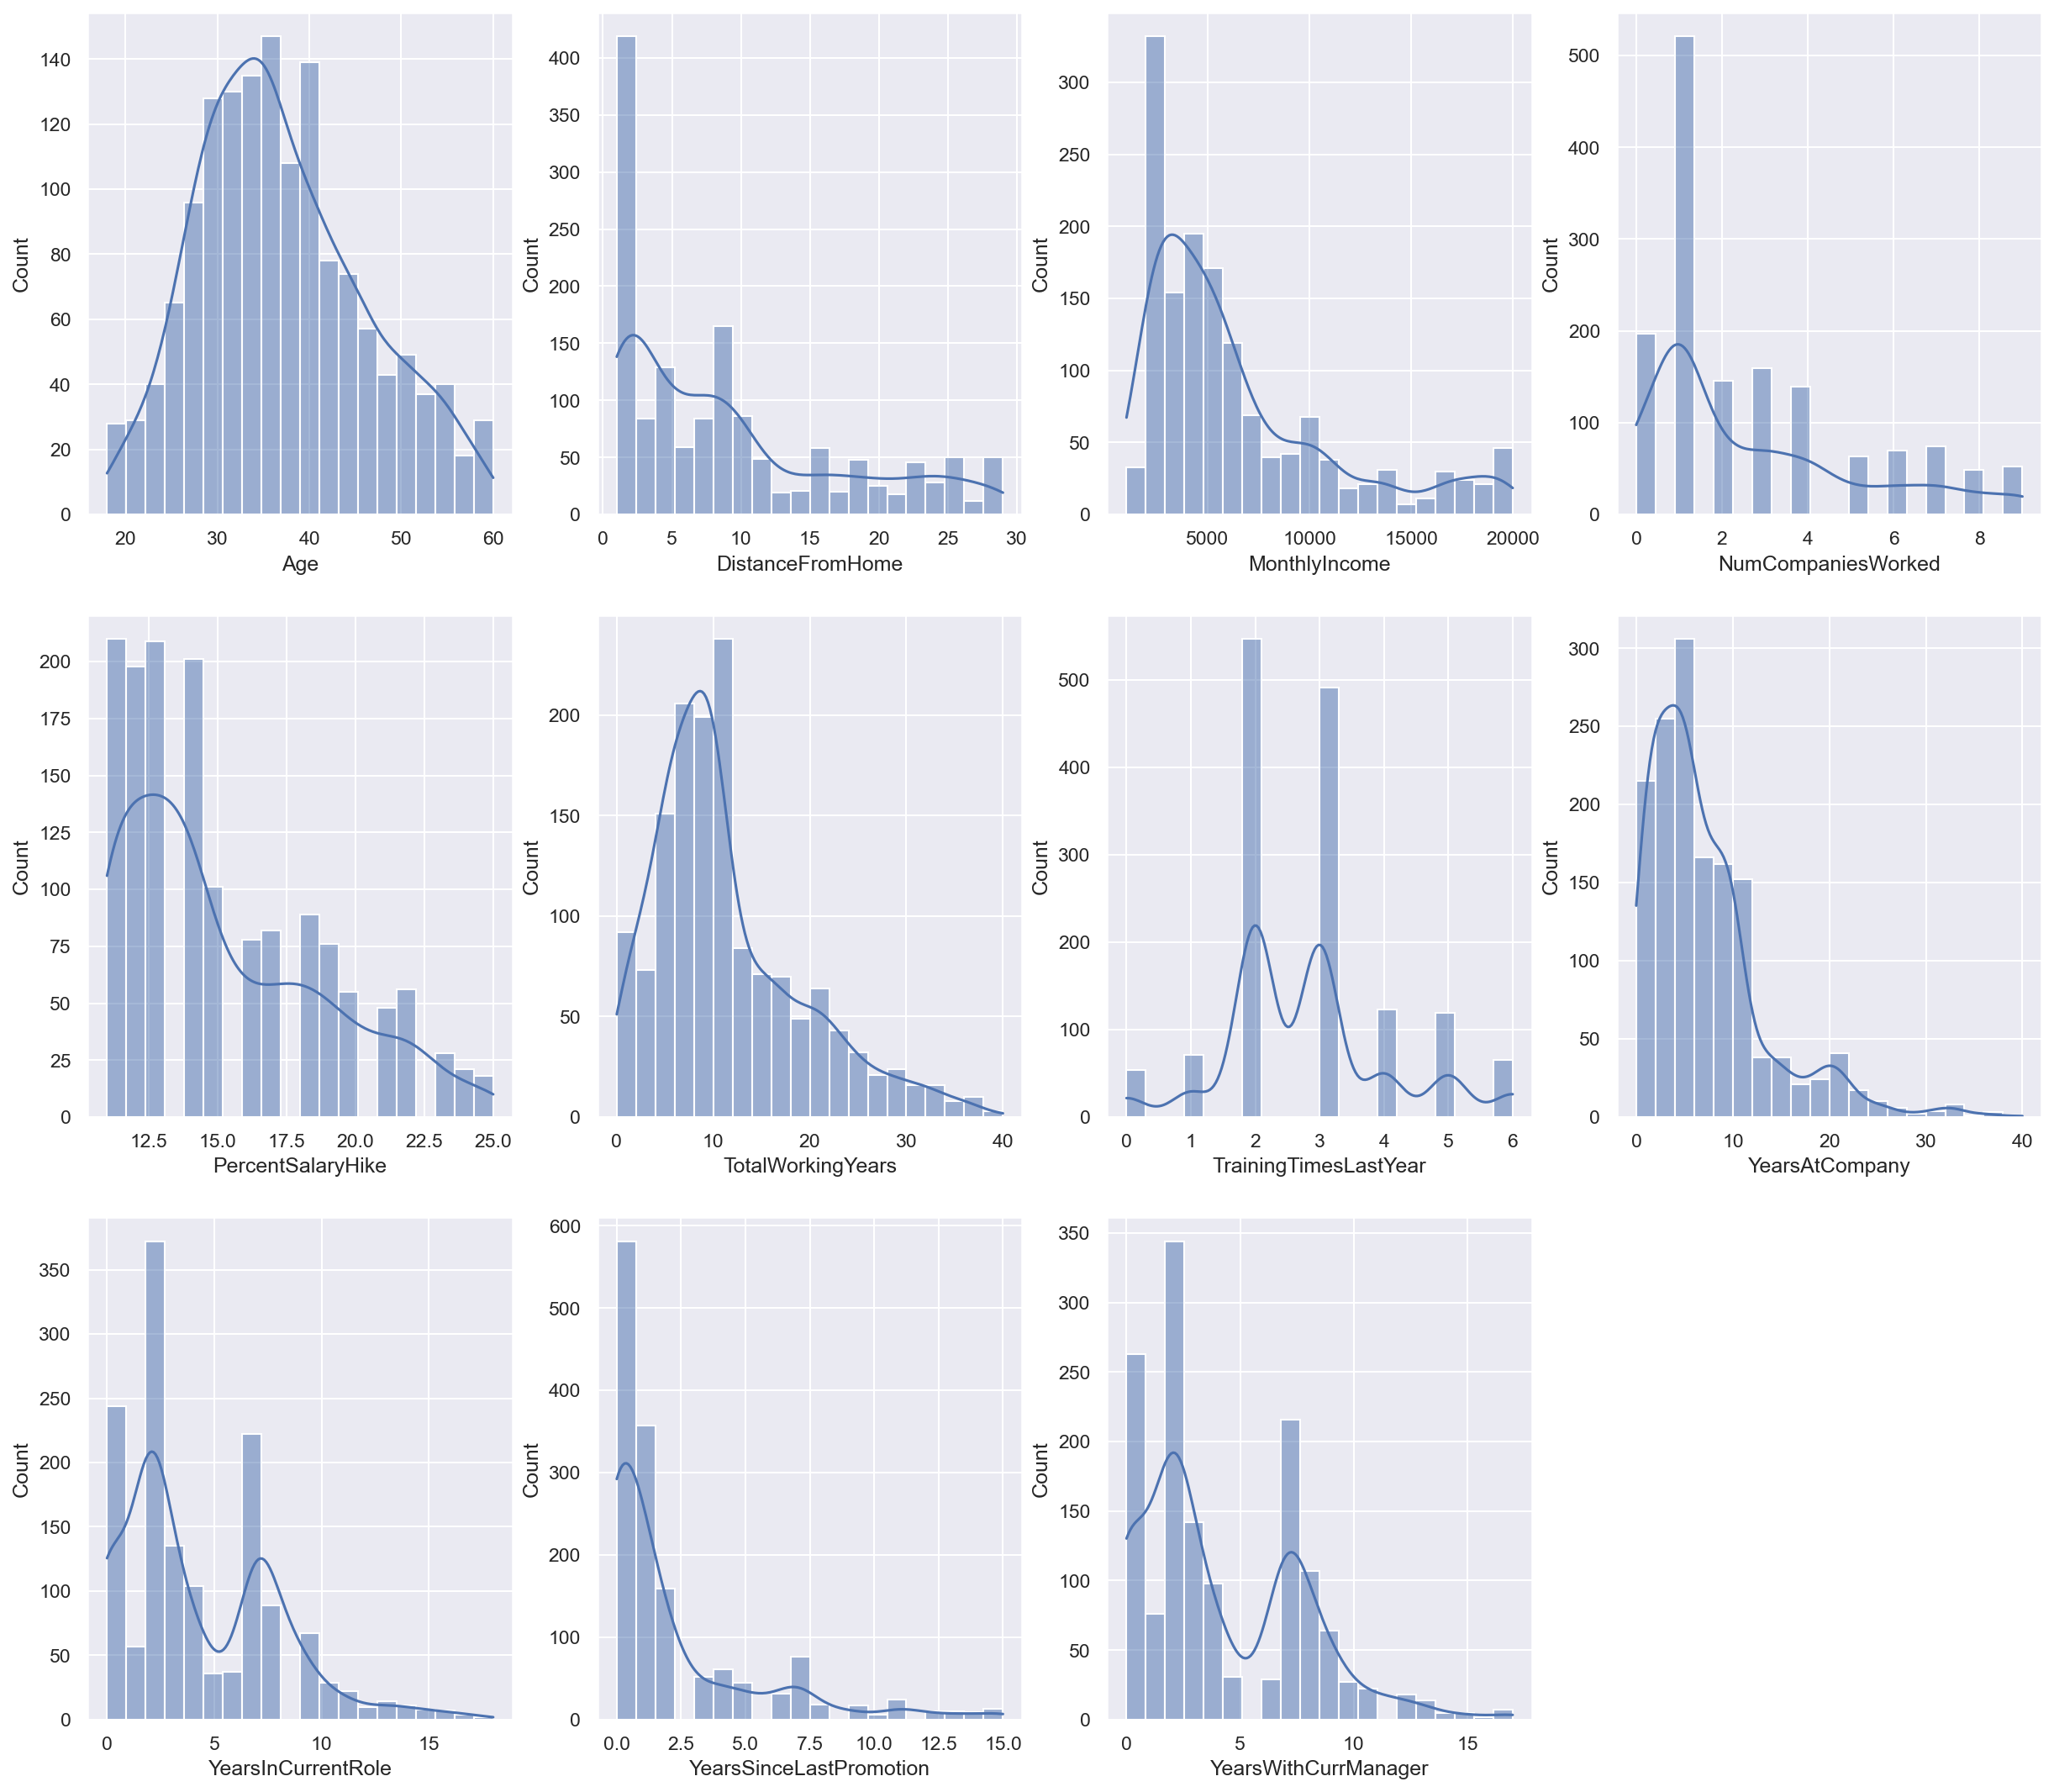

In [547]:
# Histogram plot for each numerical variable 

plt.figure(figsize=(20,30),dpi=150 )
for i,col in enumerate(num_columns,start=1):
    plt.subplot(5,4,i)
    sns.histplot(employee_df[col],kde=True, bins=20)
    sns.set(style='darkgrid')
plt.show()

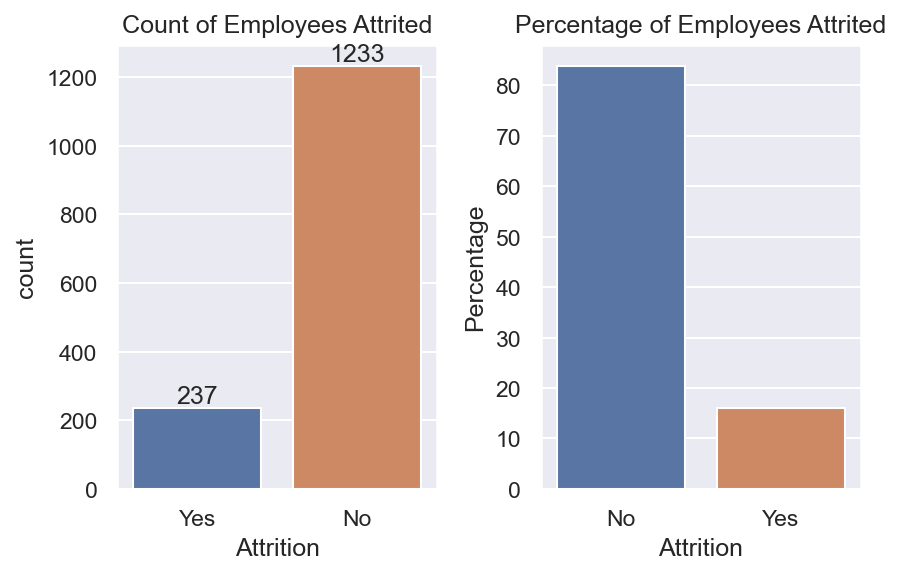

In [548]:
# check the distribution of the target variable
plt.figure(figsize=(6,4),dpi=150)

plt.subplot(1,2,1)
ax1 = sns.countplot(data=employee_df,x='Attrition')
plt.title('Count of Employees Attrited')
for i in ax1.containers:
    ax1.bar_label(i,)

att_percentages = pd.DataFrame(employee_df['Attrition'].value_counts(normalize=True) * 100).transpose()
plt.subplot(1,2,2)
ax2 = sns.barplot(data = att_percentages) 
plt.xlabel('Attrition') 
plt.ylabel('Percentage') 
plt.title('Percentage of Employees Attrited') 
plt.tight_layout()



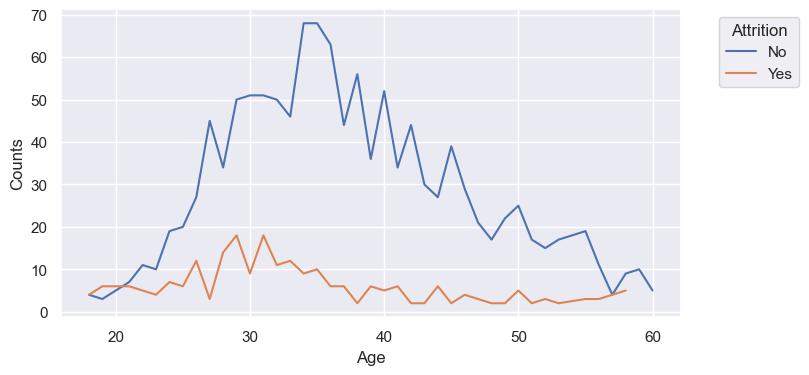

In [549]:
#Age wise counts of Workers

age_att=employee_df.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

plt.figure(figsize=(8,4))
sns.lineplot(data=age_att,x='Age',y='Counts',hue='Attrition')
plt.legend(title='Attrition',bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


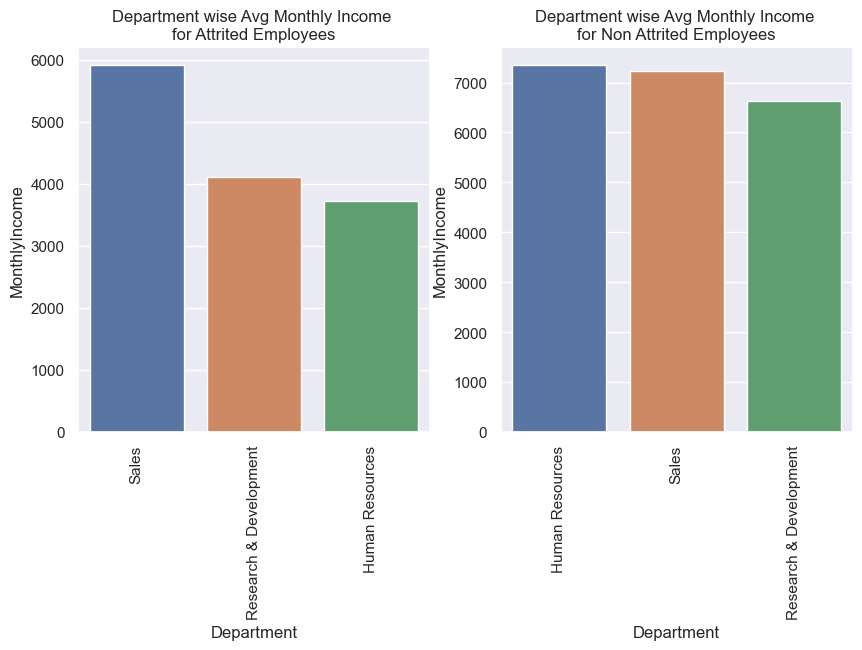

In [550]:
#Comparison of Department wise avg Monthly Incomes for Attrited and Non-Attrited employees

inc_dr = employee_df.groupby(['Department','Attrition'])['MonthlyIncome'].mean().sort_values(ascending=False).reset_index()
inc_dr

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(inc_dr[inc_dr['Attrition']=='Yes'],x='Department',y='MonthlyIncome')
plt.xticks(rotation=90)
plt.title('Department wise Avg Monthly Income \nfor Attrited Employees')

plt.subplot(1,2,2)
sns.barplot(inc_dr[inc_dr['Attrition']=='No'],x='Department',y='MonthlyIncome')
plt.xticks(rotation=90)
plt.title('Department wise Avg Monthly Income \nfor Non Attrited Employees')

plt.show() 

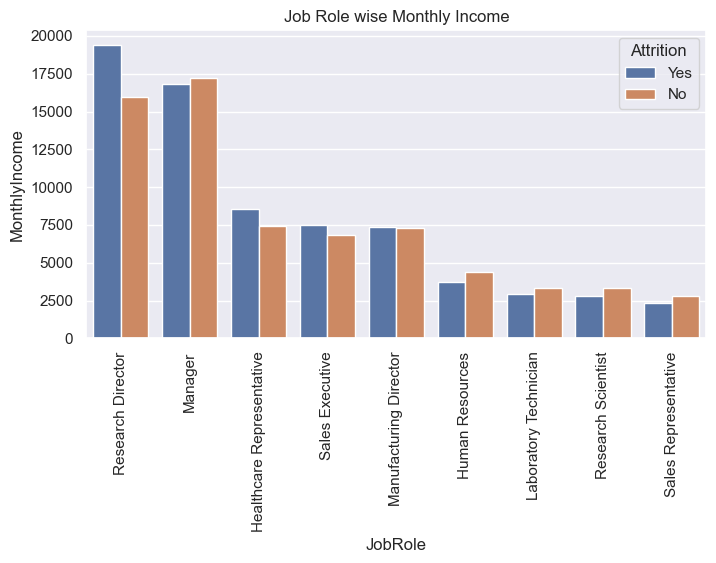

In [551]:
#Check which job roles are having more attrition despite higher monthly salaries

inc_jr = employee_df.groupby(['JobRole','Attrition'])['MonthlyIncome'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(inc_jr,x='JobRole',y='MonthlyIncome',hue='Attrition')
plt.xticks(rotation=90)
plt.title('Job Role wise Monthly Income')
plt.show()

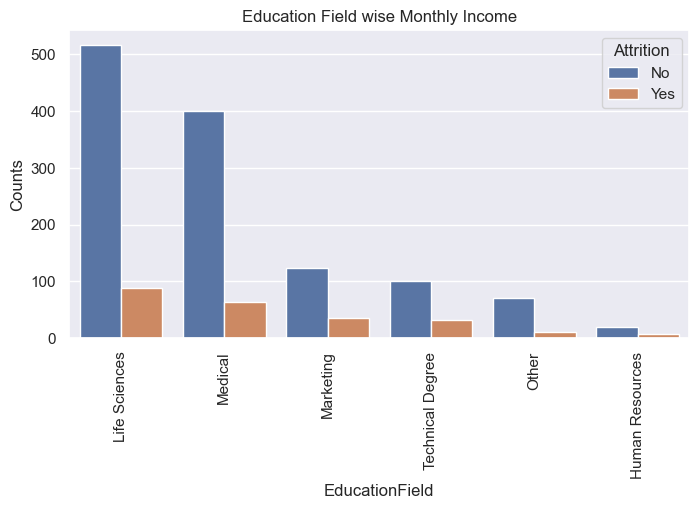

In [552]:
#Check which Education Field wise attrition 

inc_ef = employee_df.groupby(['EducationField','Attrition'])['DailyRate'].count().sort_values(ascending=False).reset_index(name='Counts')

plt.figure(figsize=(8,4))
sns.barplot(inc_ef,x='EducationField',y='Counts',hue='Attrition')
plt.xticks(rotation=90)
plt.title('Education Field wise Monthly Income')
plt.show()

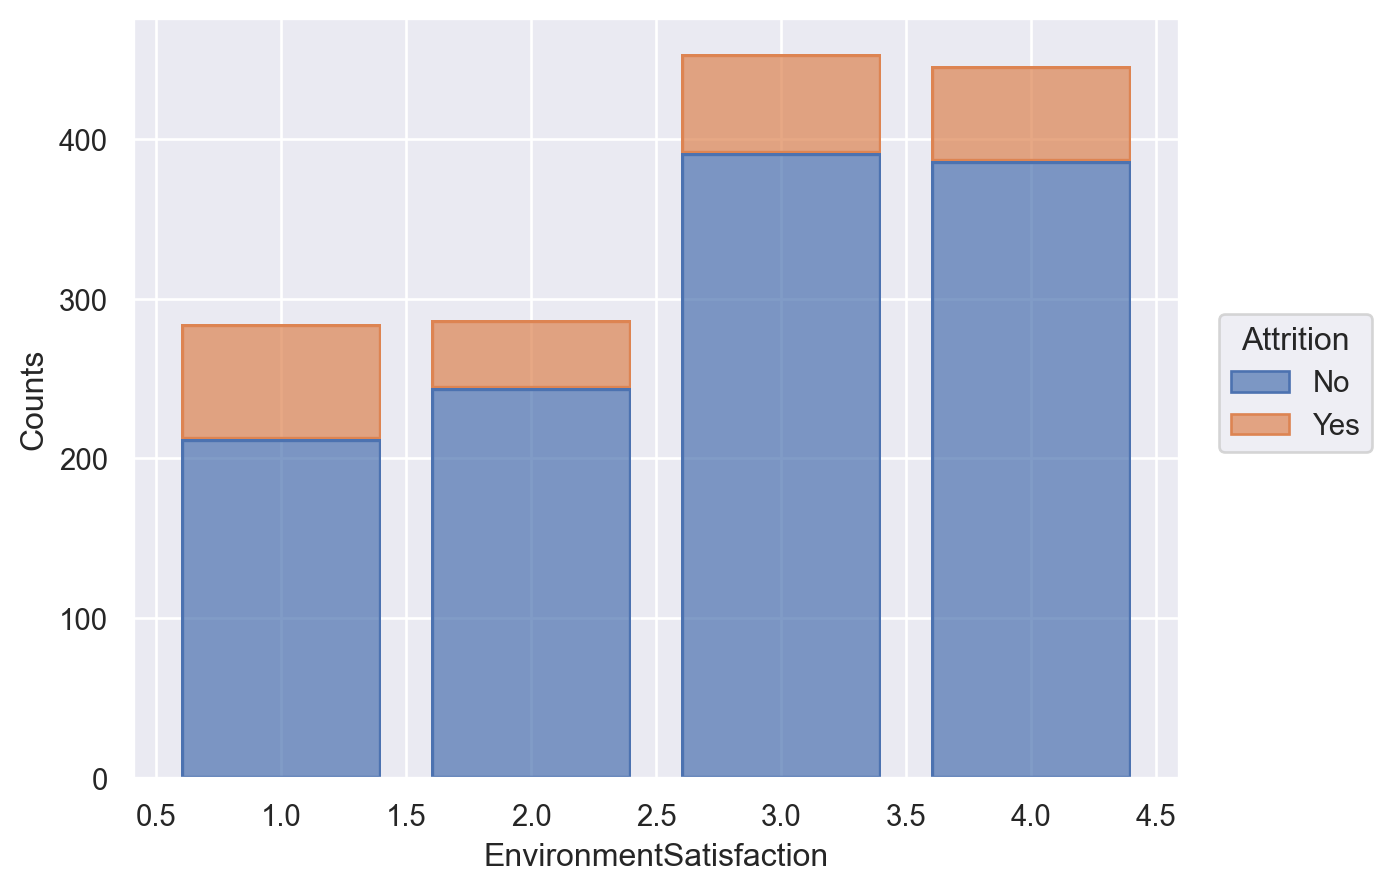

In [553]:
#How does Environmental Satisfaction affect attrition

sats_att=employee_df.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
import seaborn.objects as so

(
  so.Plot(sats_att, x="EnvironmentSatisfaction", y="Counts", color="Attrition")
  .add(so.Bar(), so.Stack())
)

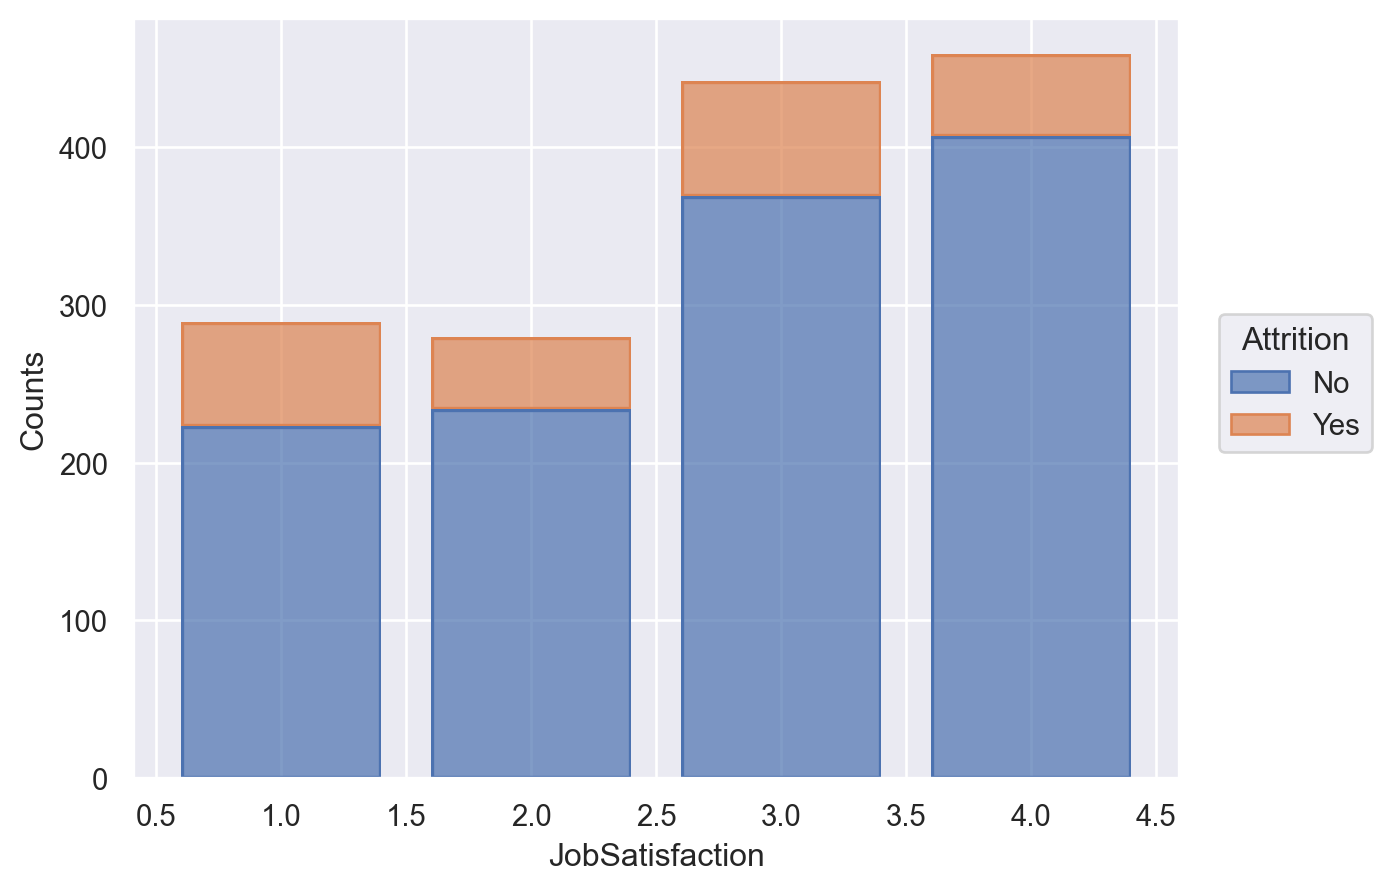

In [554]:
#How does Job Satisfaction affect attrition

jsats_att=employee_df.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
import seaborn.objects as so

(
  so.Plot(jsats_att, x="JobSatisfaction", y="Counts", color="Attrition")
  .add(so.Bar(), so.Stack())
)


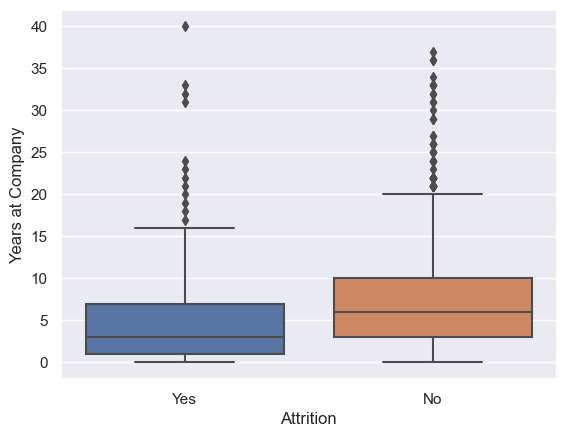

In [555]:
#How does no. of Years at Company affect Attrition

sns.boxplot(employee_df,x='Attrition',y='YearsAtCompany')
plt.ylabel('Years at Company')
plt.show()

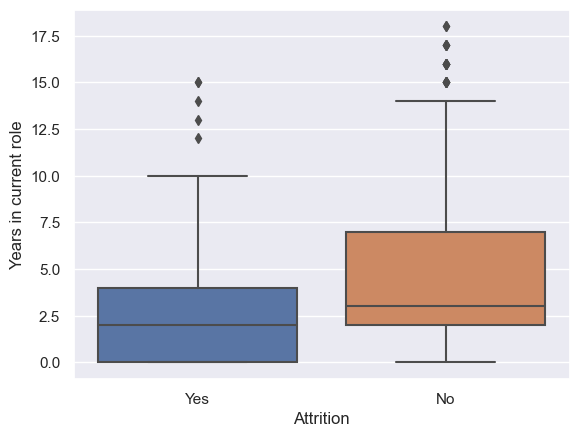

In [556]:
#How does no. of Years in Current Role affect Attrition

sns.boxplot(employee_df,x='Attrition',y='YearsInCurrentRole')
plt.ylabel('Years in current role')
plt.show()

## Feature Engineering

In [560]:
target_var = employee_df['Attrition']

In [561]:
cols_to_compute =['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
              'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
               'YearsSinceLastPromotion', 'YearsWithCurrManager','Department', 'MaritalStatus', 'Over18', 'Gender','Education','EducationField',
                   'BusinessTravel', 'JobLevel', 'JobRole','EnvironmentSatisfaction','JobInvolvement', 'JobSatisfaction',
               'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

In [562]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(
    employee_df[cols_to_compute],
    target_var,
    test_size=0.20, random_state=42)

### 1. Median Imputer

In [564]:
#check null for numerical variables

X_train_num = X_train[num_columns] 
X_test_num = X_test[num_columns]

X_train_num.isnull().sum()

Age                        0
DistanceFromHome           0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

### 2. Outliers handling

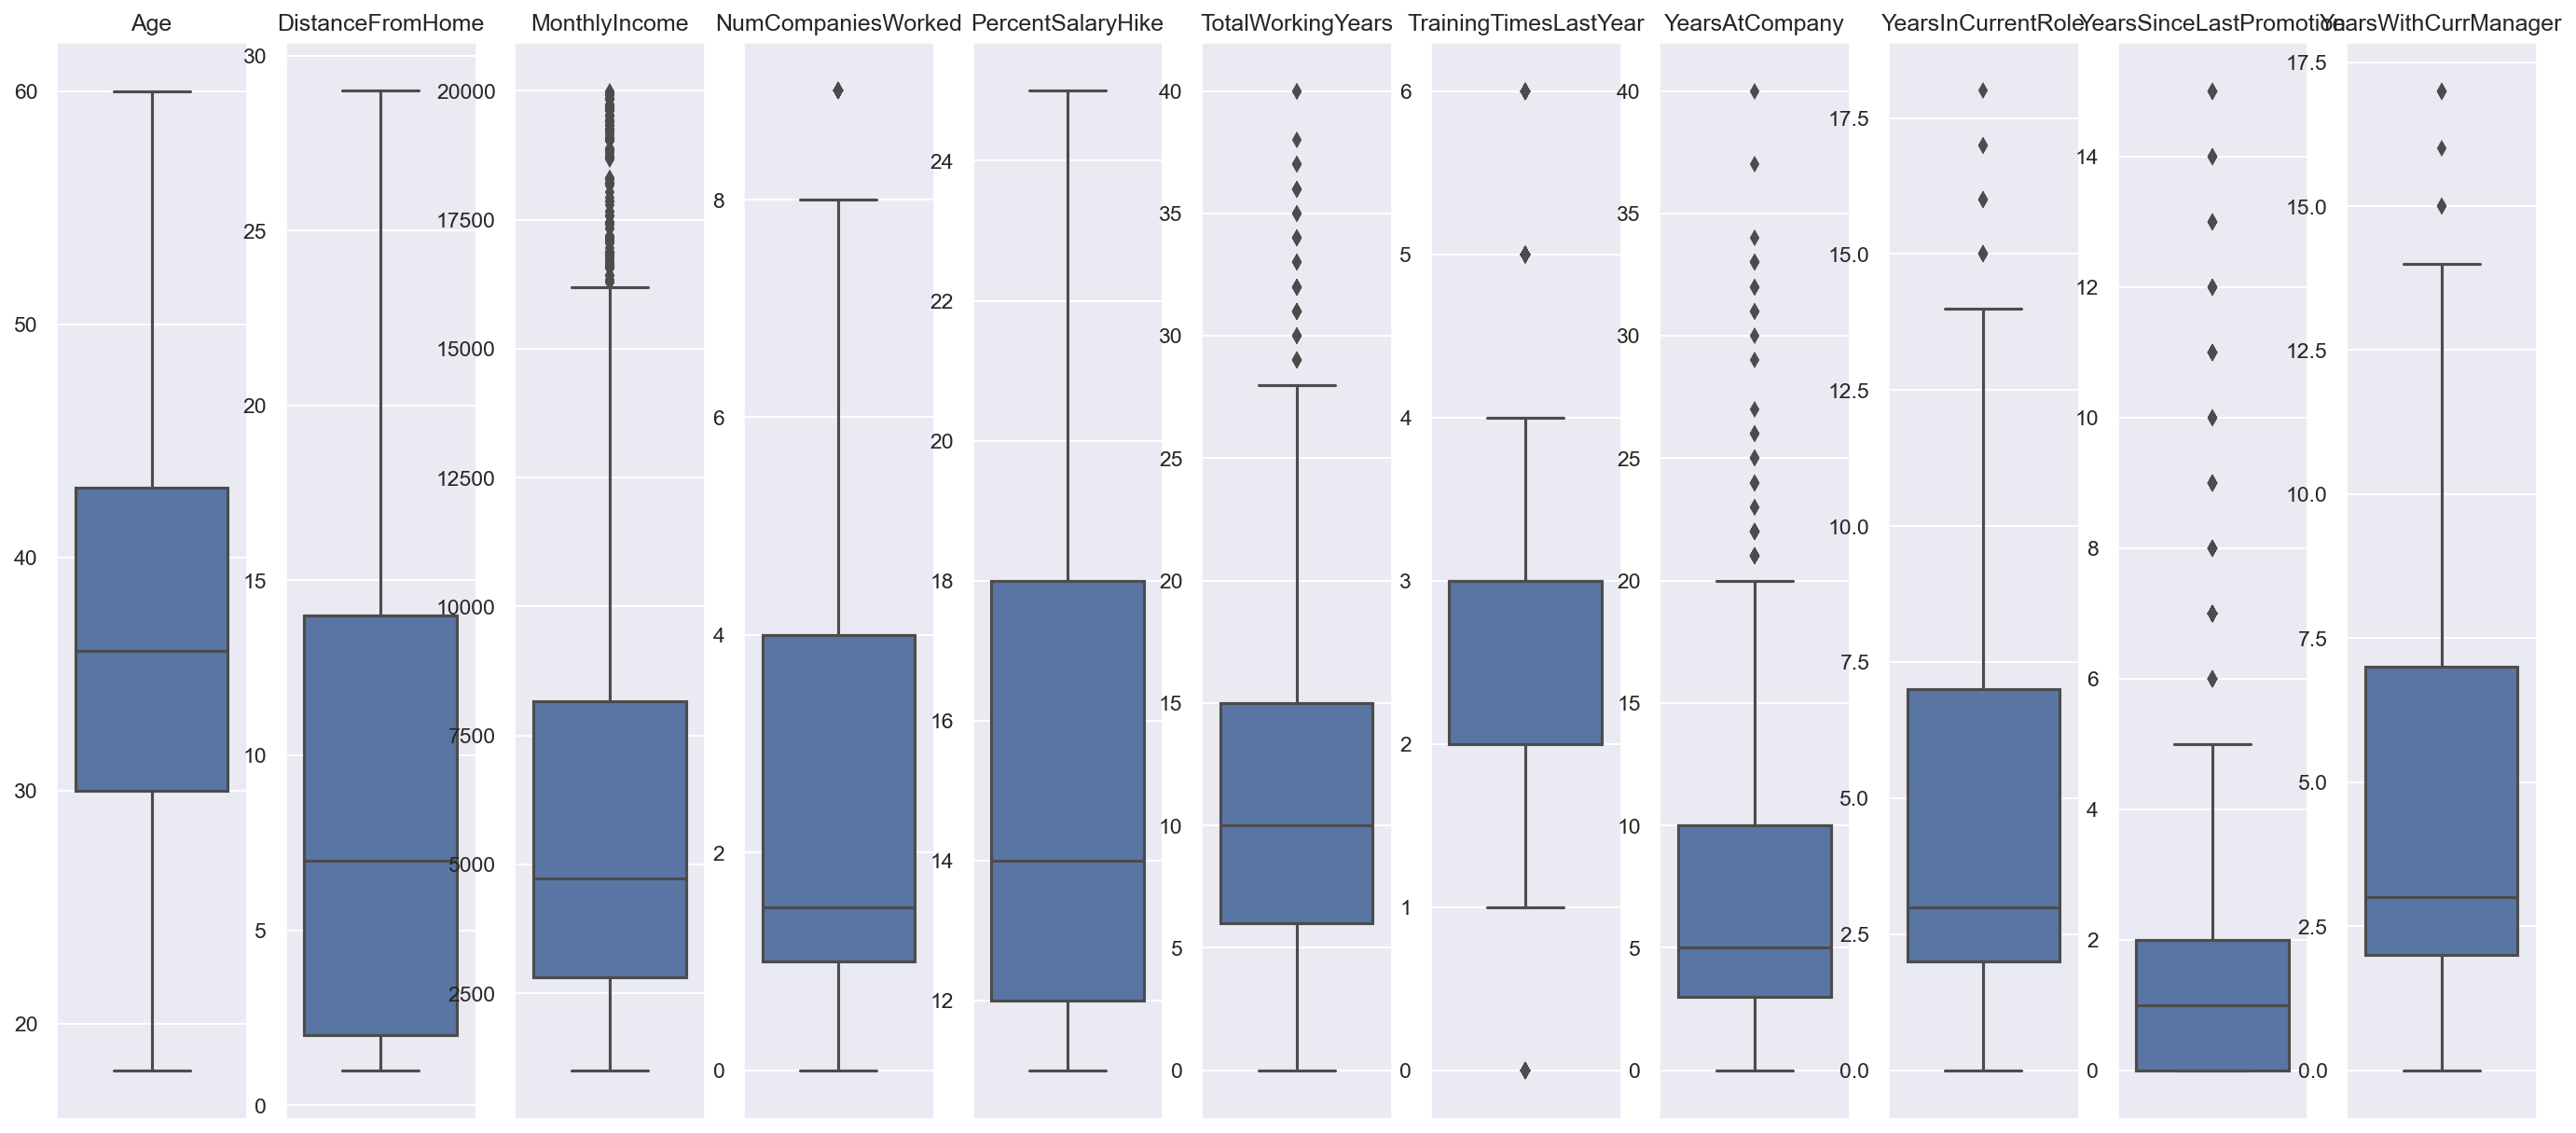

In [566]:
#Check for outliers in training set using boxplot

plt.figure(figsize=(25,10),dpi=150)
for i,var in enumerate(num_columns):
    plt.subplot(1,len(num_columns)+1,(i+1))
    ax=sns.boxplot(y=X_train_num[var])
    ax.set(ylabel=None)
    ax.set(title=var)


In [567]:
#Function to get interquartile range and define boundaries

def outlier_handle(col_name):
    third_quantile = X_train_num[col_name].quantile(0.75)
    first_quantile = X_train_num[col_name].quantile(0.25)
    IQR = third_quantile - first_quantile
    lower_range = first_quantile - 1.5*(IQR)
    upper_range = third_quantile + 1.5*(IQR)
    return lower_range, upper_range

In [568]:
#Replace outliers by upper and lower boundaries in training set

X_train_out_hand = X_train_num.copy(deep=True)

for i in num_columns:
    X_train_out_hand[i] = np.where(X_train_out_hand[i]< outlier_handle(i)[0], outlier_handle(i)[0],
                          np.where(X_train_out_hand[i]> outlier_handle(i)[1], outlier_handle(i)[1],
                                   X_train_out_hand[i]))

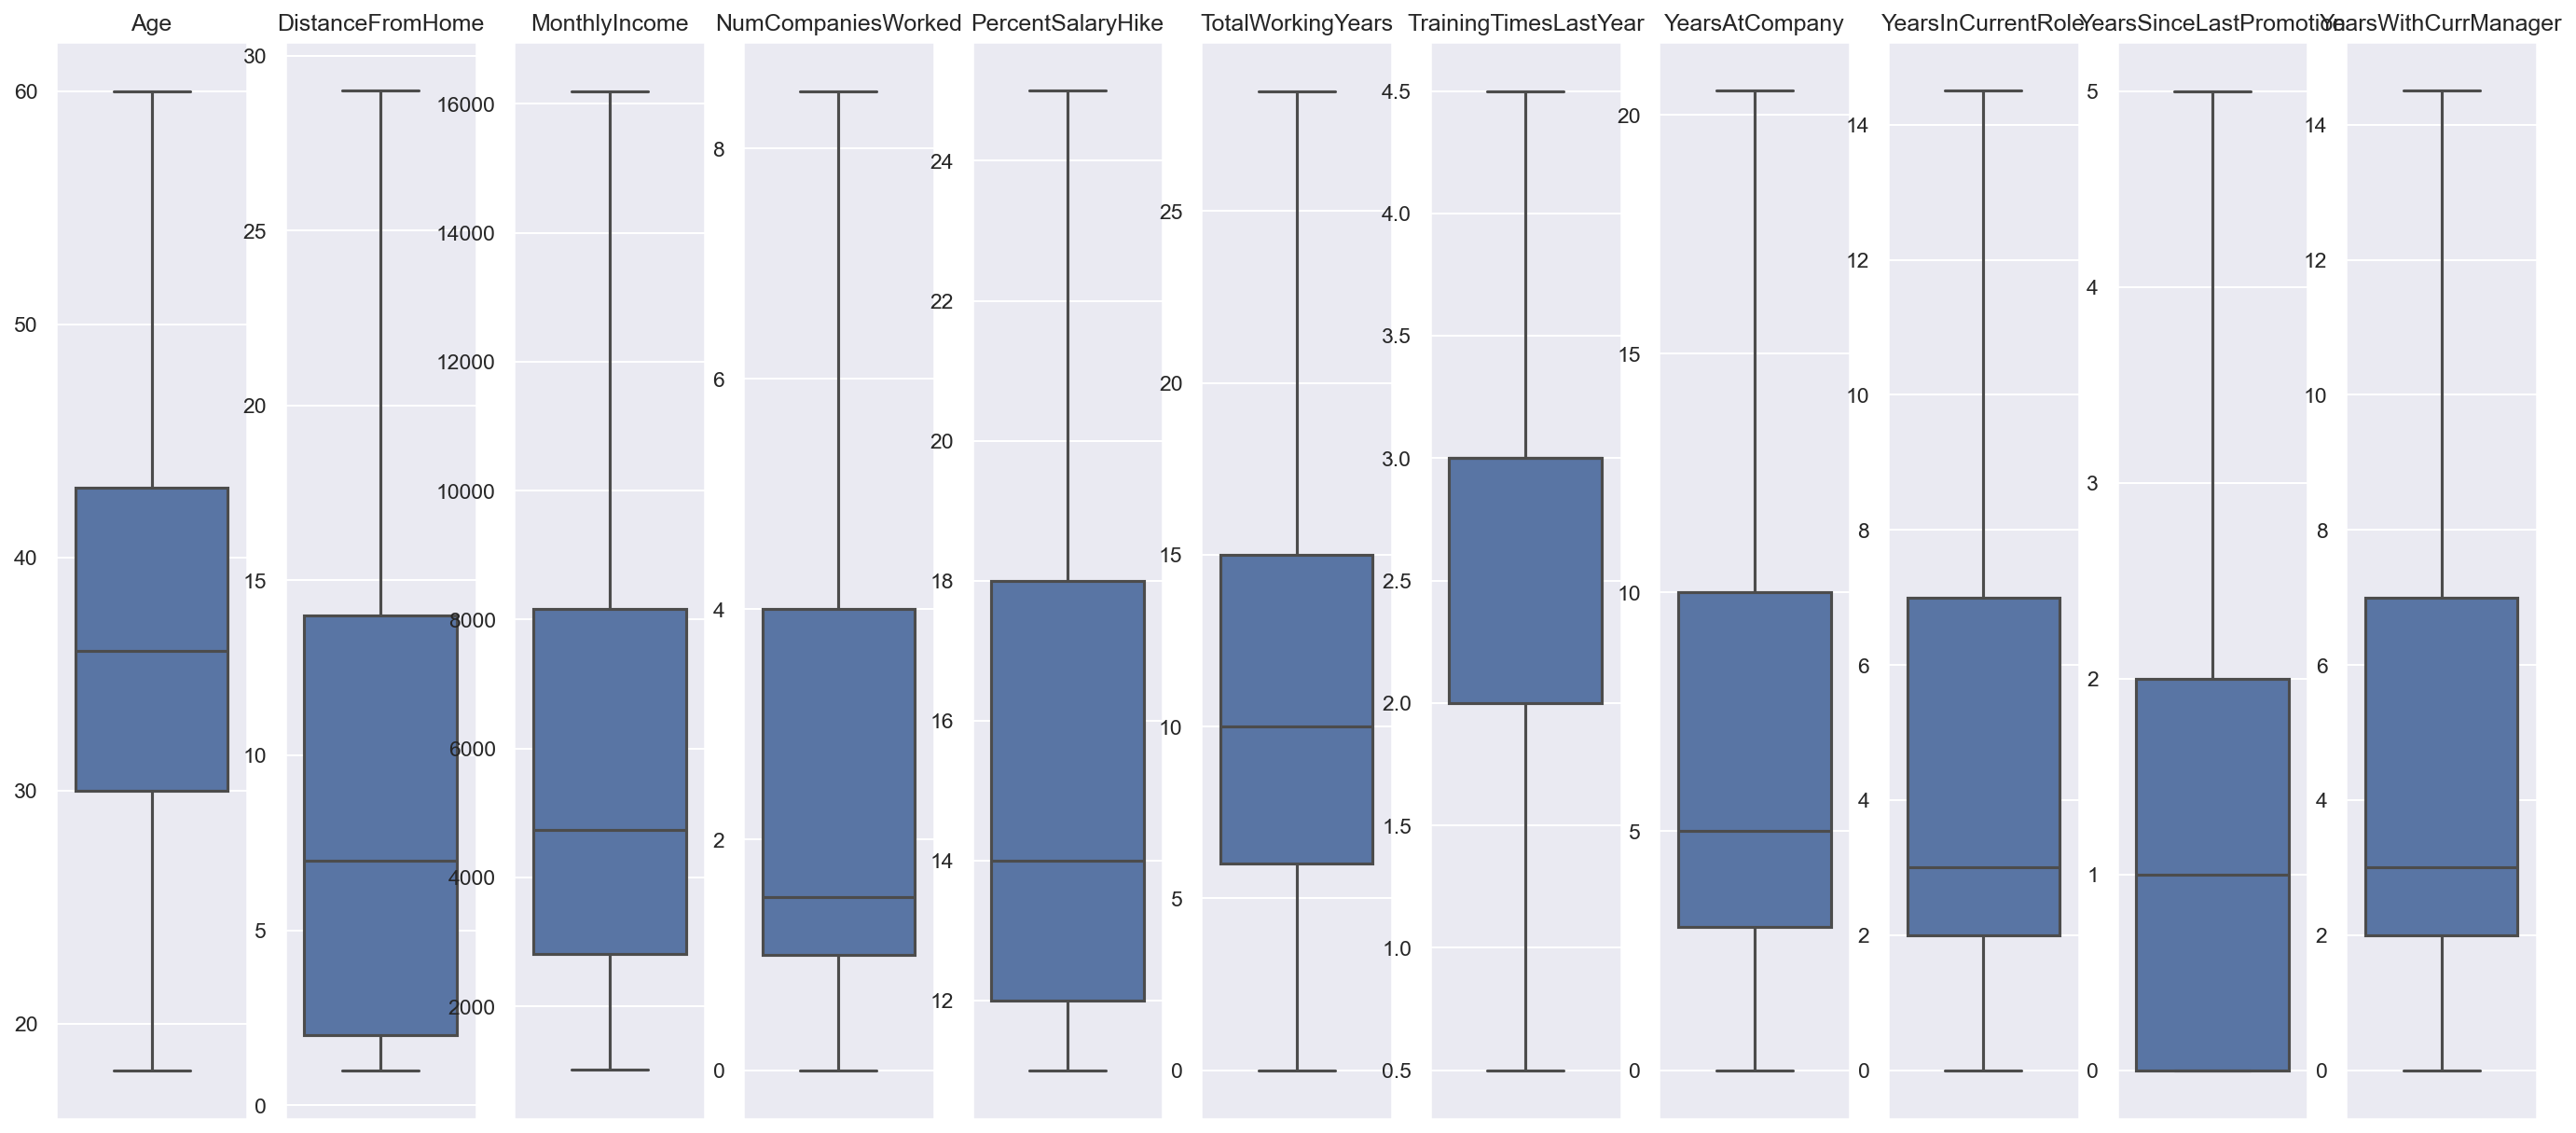

In [569]:
#Check for outliers in training set using boxplot

plt.figure(figsize=(25,10),dpi=150)
for i,var in enumerate(num_columns):
    plt.subplot(1,len(num_columns)+1,(i+1))
    ax=sns.boxplot(y=X_train_out_hand[var])
    ax.set(ylabel=None)
    ax.set(title=var)

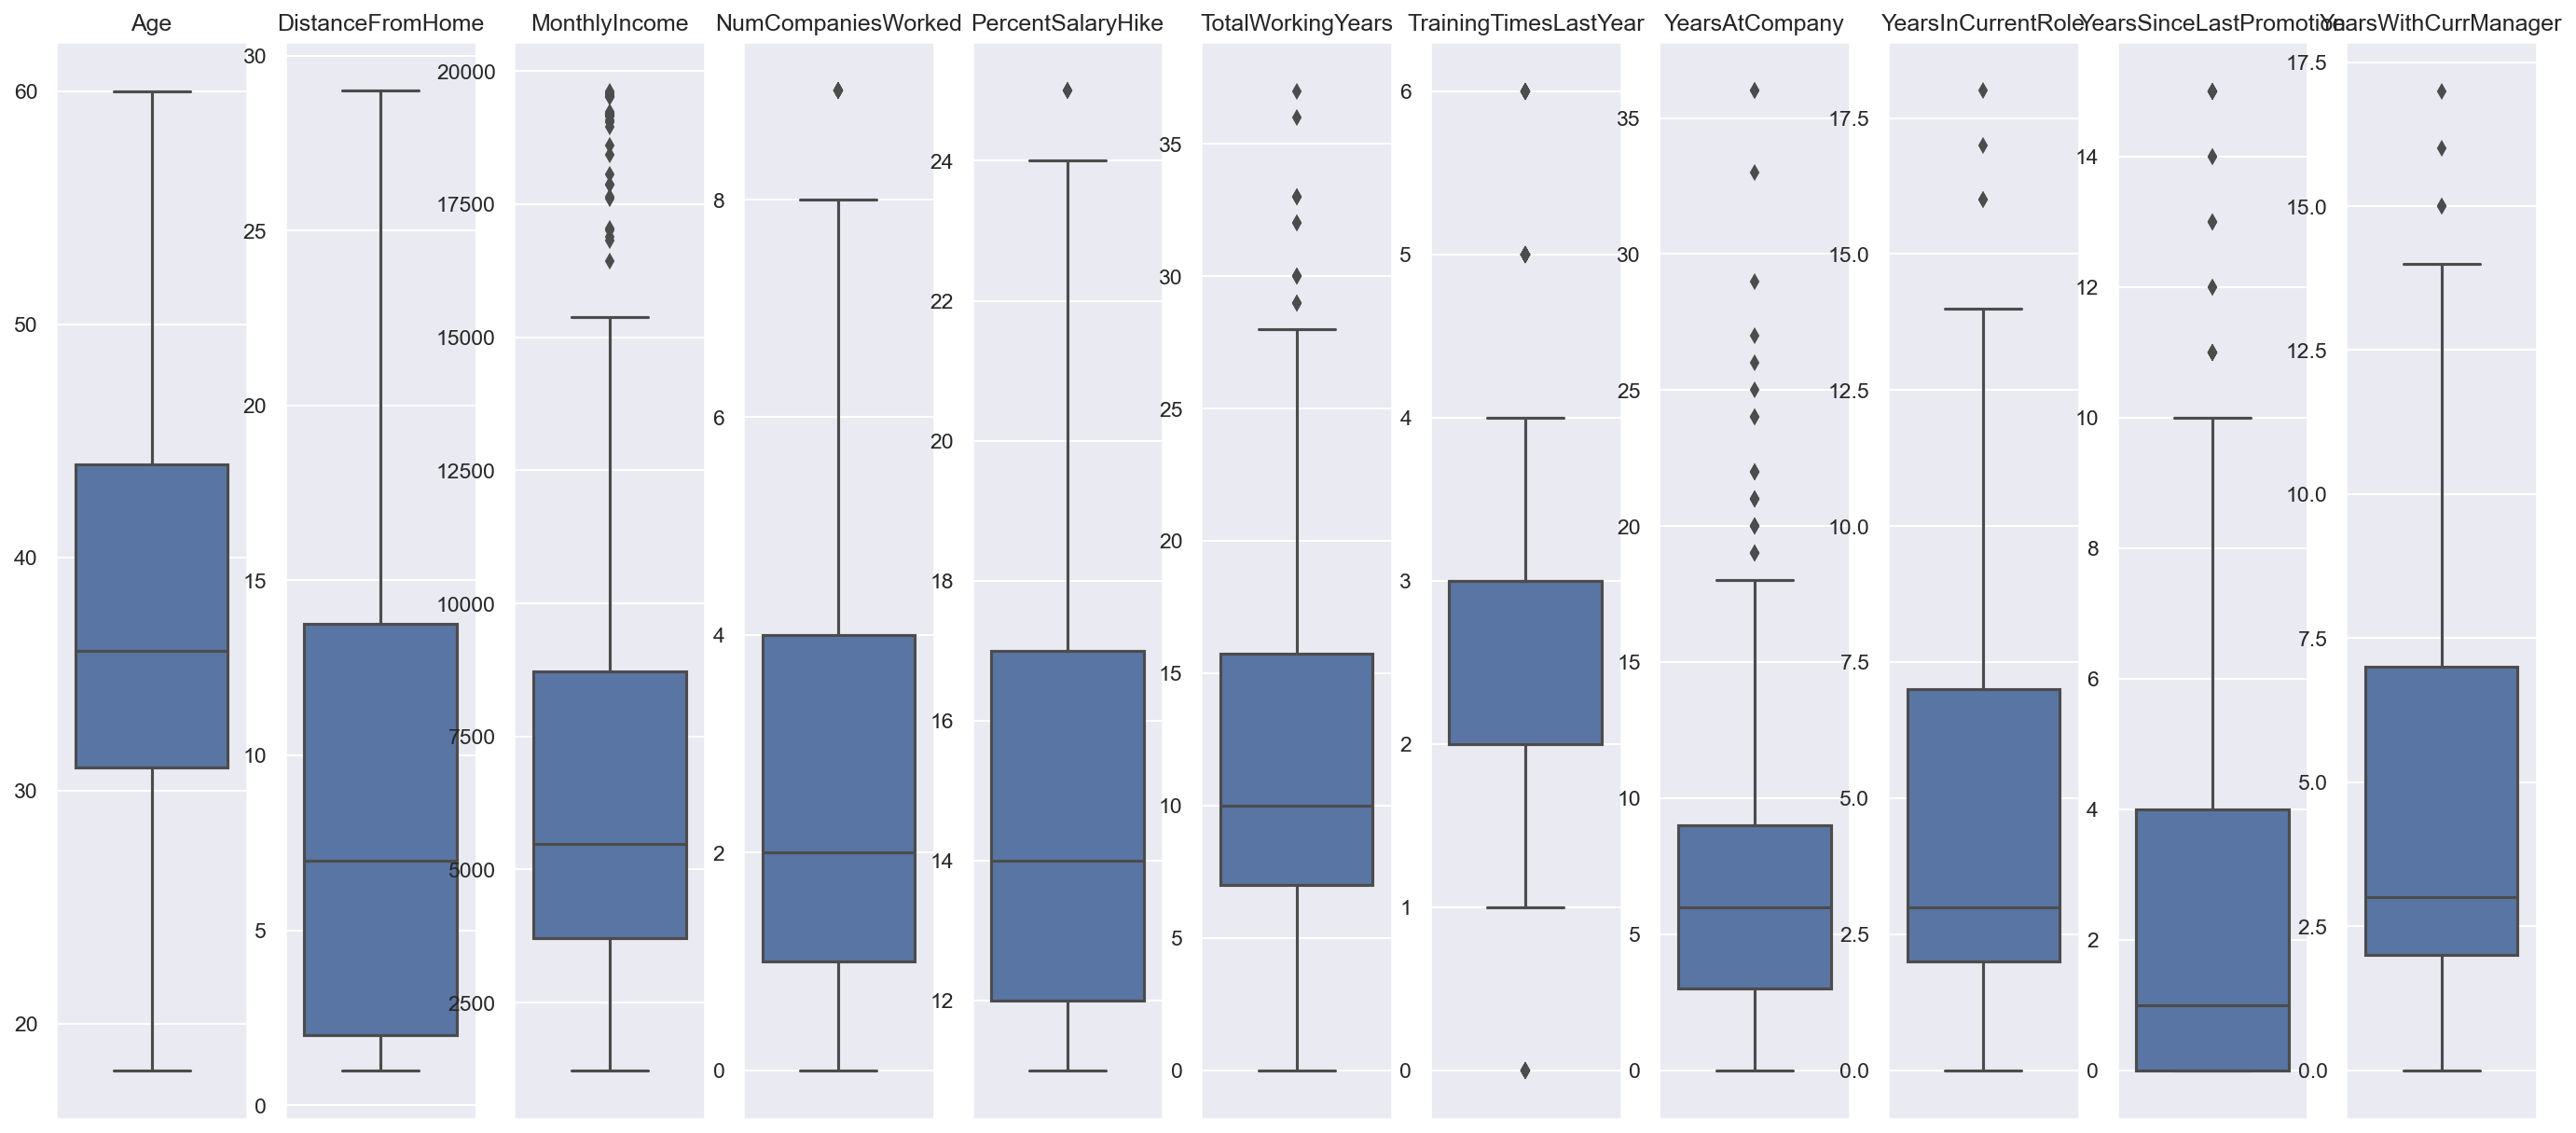

In [570]:
#Check for outliers in test set using boxplot

plt.figure(figsize=(25,10),dpi=150)
for i,var in enumerate(num_columns):
    plt.subplot(1,len(num_columns)+1,(i+1))
    ax=sns.boxplot(y=X_test_num[var])
    ax.set(ylabel=None)
    ax.set(title=var)


In [571]:
#Apply transformation on test set by using boundaries of training set

X_test_out_hand = X_test_num.copy(deep=True)

for i in num_columns:
    X_test_out_hand[i] = np.where(X_test_out_hand[i]< outlier_handle(i)[0], outlier_handle(i)[0],
                          np.where(X_test_out_hand[i]> outlier_handle(i)[1], outlier_handle(i)[1],
                                   X_test_out_hand[i]))    

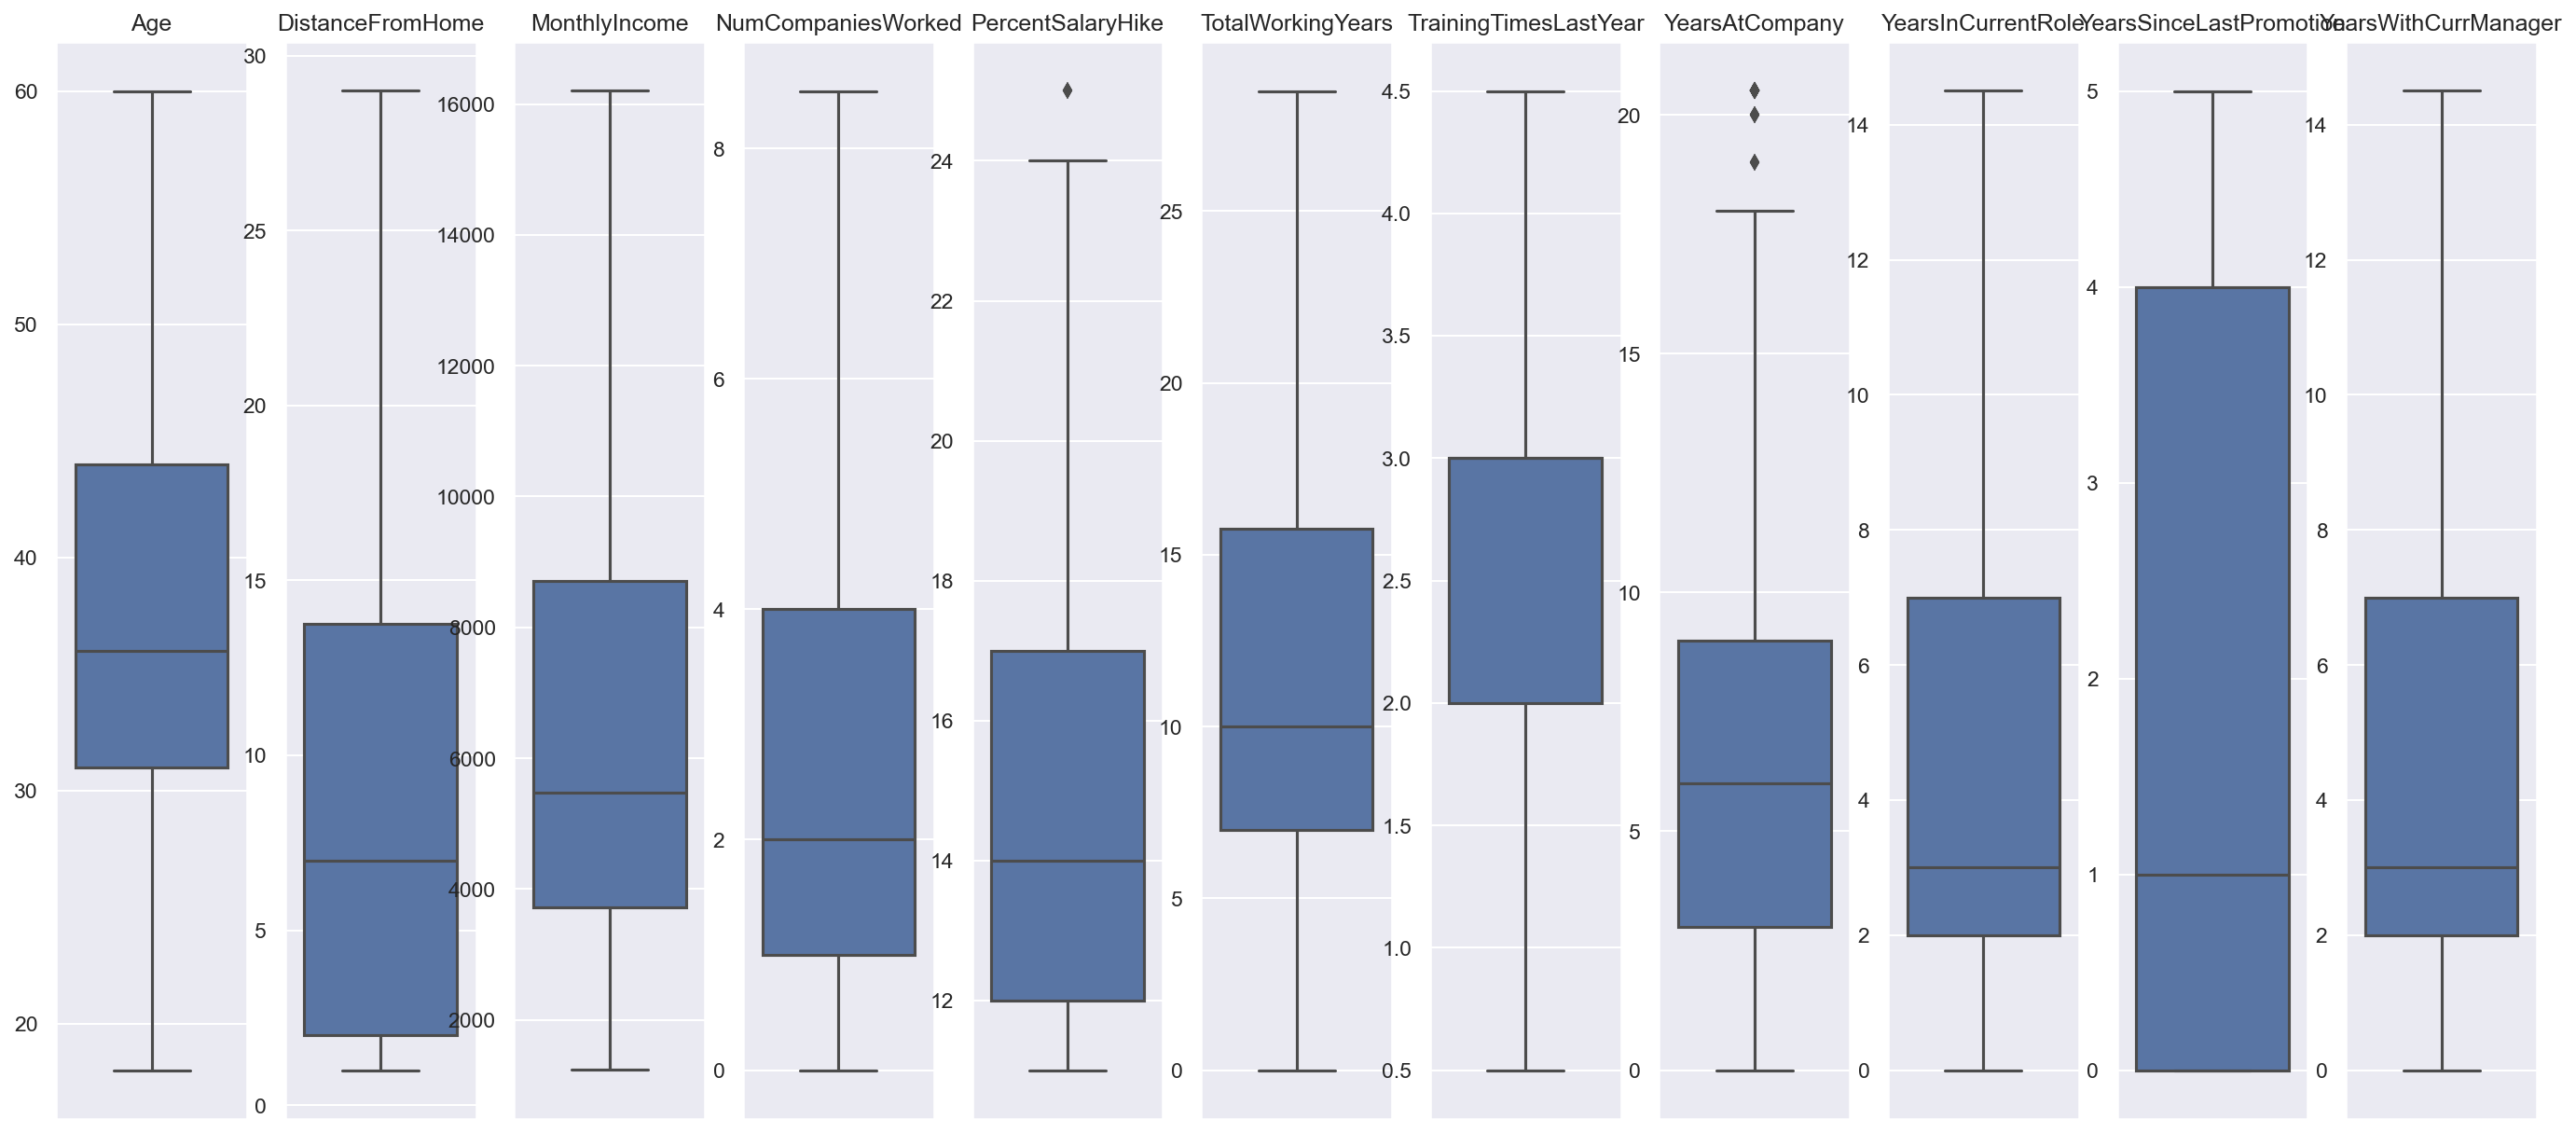

In [572]:
#Check for outliers in test set using boxplot

plt.figure(figsize=(25,10),dpi=150)
for i,var in enumerate(num_columns):
    plt.subplot(1,len(num_columns)+1,(i+1))
    ax=sns.boxplot(y=X_test_out_hand[var])
    ax.set(ylabel=None)
    ax.set(title=var)

### 3. Standard Scalar

In [575]:
#initialize the scaler
scaler = StandardScaler()

In [576]:
#fit on training set
scaler.fit(X_train_out_hand)

StandardScaler()

In [577]:
#transform training and test set
X_train_scaled = scaler.transform(X_train_out_hand)
X_test_scaled = scaler.transform(X_test_out_hand)

In [578]:
#encode back to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train_out_hand.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test_out_hand.columns)

### 4. One-Hot Encode Categorical Variables

In [581]:
#Create One Hot Encoder

X_train_cat = X_train[cat_columns] 
X_test_cat = X_test[cat_columns]

ohe_transform = OneHotEncoder(categories='auto',drop=None,
                             sparse_output=False,
                              handle_unknown='error')

In [582]:
#fit ohe on training data
ohe_transform.fit(X_train_cat.fillna('Not Present'))

OneHotEncoder(sparse_output=False)

In [583]:
ohe_transform.categories_

[array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Y'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([1, 2, 3, 4, 5], dtype=int64),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object),
 array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array([1, 2, 3, 4, 5], dtype=int64),
 array(['Healthcare Representative', 'Human Resources',
        'Laboratory Technician', 'Manager', 'Manufacturing Director',
        'Research Director', 'Research Scientist', 'Sales Executive',
        'Sales Representative'], dtype=object),
 array([1, 2, 3, 4], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([3, 4], dtype=int64),
 array([1, 2, 3, 4], dtype=int64),
 array([0, 1, 2, 3], dtype=int64),
 array([1, 2, 3, 4], dtype=int64)]

In [584]:
feature_names = ohe_transform.get_feature_names_out()

In [585]:
#transform training and test data
X_train_cat_ohe =  ohe_transform.transform(X_train_cat.fillna('Not Present'))
X_test_cat_ohe = ohe_transform.transform(X_test_cat.fillna('Not Present'))

In [586]:
X_test_cat_ohe.shape

(294, 63)

In [587]:
#create dataframes from the transformed arrays
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe,columns=feature_names)
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe,columns=feature_names)

In [588]:
#Create One Hot Encoder for target
y_test
ohe_transform = OneHotEncoder(categories='auto',drop=None,
                             sparse_output=False,
                              handle_unknown='error')

In [589]:
#fit on training target variable
ohe_transform.fit(y_train.to_frame().fillna('Not Present'))

OneHotEncoder(sparse_output=False)

In [590]:
ohe_transform.get_feature_names_out()

array(['Attrition_No', 'Attrition_Yes'], dtype=object)

In [591]:
#transform training and test target data

y_train = ohe_transform.transform(y_train.to_frame().fillna('Not Present'))
y_test = ohe_transform.transform(y_test.to_frame().fillna('Not Present'))

In [592]:
y_train = y_train[:,0]
y_test = y_test[:,0]

In [593]:
y_test

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1.

### 4. Join num and Cat variables

In [596]:
# num dataframes
X_train_scaled
X_test_scaled.head(3)

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.953774,-0.522699,0.520944,-1.071151,0.752289,-0.675185,1.241027,-0.318546,-0.053268,-0.312953,-0.291253
1,1.763636,0.458849,-0.411588,-0.664083,-1.157903,-0.812013,0.281495,-0.505199,-0.616352,-0.312953,-0.291253
2,-1.388559,1.563090,-1.084322,-0.664083,-1.157903,-1.359328,-0.678036,-1.065155,-1.179435,-0.855774,-1.154733


In [597]:
# cat dataframes
X_train_cat_ohe
X_test_cat_ohe.head(3)

,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Gender_Female,Gender_Male,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [598]:
#join numerical and categorical transformed datasets
X_train_final = X_train_scaled.join(X_train_cat_ohe)
X_test_final = X_test_scaled.join(X_test_cat_ohe)

In [599]:
X_train_final.head(3)

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Gender_Female,Gender_Male,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,-1.388559,1.440396,-0.912130,-1.071151,-0.339249,-1.222500,0.281495,-1.065155,-0.897894,-0.855774,-1.154733,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-2.040738,-0.522699,-1.201440,-0.664083,-0.066365,-1.496157,-0.678036,-1.251807,-1.179435,-0.855774,-1.154733,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.845077,1.317703,0.164941,-0.257014,-0.339249,-0.127870,-0.678036,-0.691851,-0.616352,-0.855774,-0.579080,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [600]:
X_test_final.head(3)

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,Gender_Female,Gender_Male,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,-0.953774,-0.522699,0.520944,-1.071151,0.752289,-0.675185,1.241027,-0.318546,-0.053268,-0.312953,-0.291253,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.763636,0.458849,-0.411588,-0.664083,-1.157903,-0.812013,0.281495,-0.505199,-0.616352,-0.312953,-0.291253,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.388559,1.563090,-1.084322,-0.664083,-1.157903,-1.359328,-0.678036,-1.065155,-1.179435,-0.855774,-1.154733,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Define Evaluation Metrics

In [603]:
#create evaluation matrix 
train_perf_classifier = pd.DataFrame(index= ['Accuracy','AUC_ROC','PrecisionScore','RecallScore','F1_Score'], 
                                 columns= ['Logistic Reg','KNN','SVM','Decision Tree','Random Forest','AdaBoost','Gradient Boost','XGBoost','LightGBM'])

test_perf_classifier = pd.DataFrame(index=['Accuracy','AUC_ROC','PrecisionScore','RecallScore','F1_Score'], 
                                 columns=['Logistic Reg','KNN','SVM','Decision Tree','Random Forest','AdaBoost','Gradient Boost','XGBoost','LightGBM'])    

In [604]:
#Create Evaluation function
def eval_metrics(y_test,y_pred):
    Accuracy = np.round(accuracy_score(y_test,y_pred),3)
    AUC_ROC = np.round(roc_auc_score(y_test,y_pred),3)
    PrecisionScore = np.round(precision_score(y_test,y_pred),3)
    RecallScore = np.round(recall_score(y_test,y_pred),3)
    F1_Score = np.round(f1_score(y_test,y_pred),3)
    return ((Accuracy,AUC_ROC,PrecisionScore,RecallScore,F1_Score))

## Algorithms

### 1. KNN

In [608]:
#Initialize and fit the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_final,y_train)

KNeighborsClassifier()

In [609]:
#get predictions
y_fit = knn_model.predict(X_train_final)
y_pred = knn_model.predict(X_test_final)

In [610]:
#Evaluate the Model
train_perf_classifier['KNN'] =  eval_metrics(y_train,y_fit)
test_perf_classifier['KNN'] = eval_metrics(y_test,y_pred)

In [611]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,NaN,0.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,NaN,0.622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,NaN,0.868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,NaN,0.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,NaN,0.921,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [612]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,NaN,0.847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,NaN,0.521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,NaN,0.872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,NaN,0.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,NaN,0.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [613]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.25      0.08      0.12        39
         1.0       0.87      0.96      0.92       255

    accuracy                           0.85       294
   macro avg       0.56      0.52      0.52       294
weighted avg       0.79      0.85      0.81       294



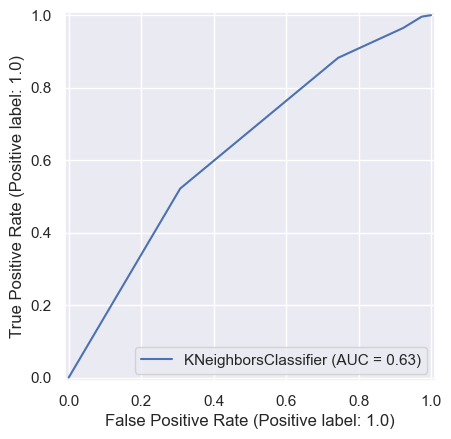

In [614]:
#display ROC Curve
RocCurveDisplay.from_estimator(knn_model,X_test_final,y_test)

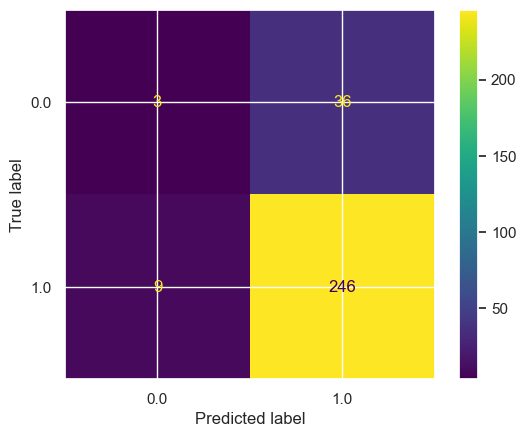

In [615]:
#display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_model,X_test_final,y_test)

### 2. Logistic Regression

In [619]:
#Initialize and fit the model
log_model = LogisticRegression()
log_model.fit(X_train_final,y_train)

LogisticRegression()

In [620]:
#get predictions
y_fit = log_model.predict(X_train_final)
y_pred = log_model.predict(X_test_final)

In [621]:
#Evaluate the Model
train_perf_classifier['Logistic Reg'] =  eval_metrics(y_train,y_fit)
test_perf_classifier['Logistic Reg'] = eval_metrics(y_test,y_pred)

In [622]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.661,0.622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.881,0.868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,0.973,0.981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,0.925,0.921,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [623]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.645,0.521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.904,0.872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,0.957,0.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,0.930,0.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [624]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.54      0.33      0.41        39
         1.0       0.90      0.96      0.93       255

    accuracy                           0.87       294
   macro avg       0.72      0.65      0.67       294
weighted avg       0.86      0.87      0.86       294



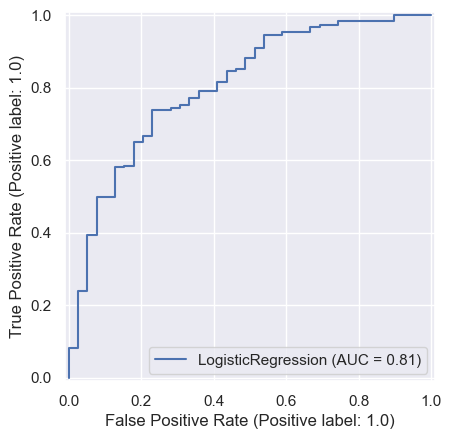

In [625]:
#display ROC Curve
RocCurveDisplay.from_estimator(log_model,X_test_final,y_test)

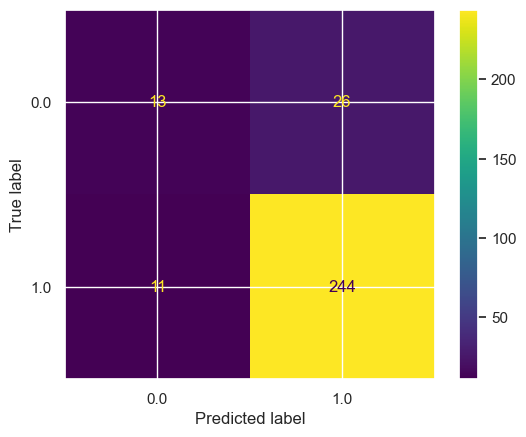

In [626]:
#display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_model,X_test_final,y_test)

### 3. SVM

In [629]:
#Initialize and fit the model
svm = SVC(kernel='rbf')
svm.fit(X_train_final,y_train)

SVC()

In [630]:
#get predictions
y_fit = svm.predict(X_train_final)
y_pred = svm.predict(X_test_final)

In [631]:
#Evaluate the Model
train_perf_classifier['SVM'] = eval_metrics(y_train,y_fit)
test_perf_classifier['SVM'] = eval_metrics(y_test,y_pred)

In [632]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.661,0.622,0.654,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.881,0.868,0.877,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,0.973,0.981,0.999,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,0.925,0.921,0.934,NaN,NaN,NaN,NaN,NaN,NaN


In [633]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,NaN,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.645,0.521,0.577,NaN,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.904,0.872,0.885,NaN,NaN,NaN,NaN,NaN,NaN
RecallScore,0.957,0.965,1.000,NaN,NaN,NaN,NaN,NaN,NaN
F1_Score,0.930,0.916,0.939,NaN,NaN,NaN,NaN,NaN,NaN


In [634]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.15      0.27        39
         1.0       0.89      1.00      0.94       255

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.60       294
weighted avg       0.90      0.89      0.85       294



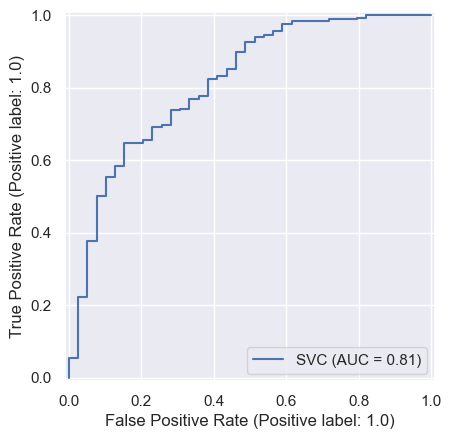

In [635]:
#display ROC Curve
RocCurveDisplay.from_estimator(svm,X_test_final,y_test)

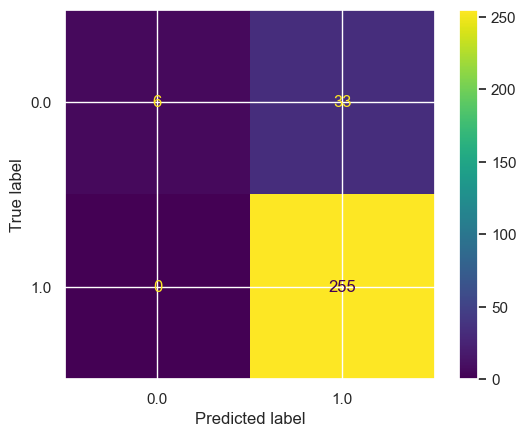

In [636]:
#display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm,X_test_final,y_test)

### 4. Decision Tree

In [640]:
#Initialize and fit the model
dtc = DecisionTreeClassifier()
dtc.fit(X_train_final,y_train)

DecisionTreeClassifier()

In [641]:
#get predictions
y_fit = dtc.predict(X_train_final)
y_pred = dtc.predict(X_test_final)

In [642]:
#Evaluate the Model
train_perf_classifier['Decision Tree'] = eval_metrics(y_train,y_fit) 
test_perf_classifier['Decision Tree'] = eval_metrics(y_test,y_pred)

In [643]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.661,0.622,0.654,1.0,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.881,0.868,0.877,1.0,NaN,NaN,NaN,NaN,NaN
RecallScore,0.973,0.981,0.999,1.0,NaN,NaN,NaN,NaN,NaN
F1_Score,0.925,0.921,0.934,1.0,NaN,NaN,NaN,NaN,NaN


In [644]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.789,NaN,NaN,NaN,NaN,NaN
AUC_ROC,0.645,0.521,0.577,0.596,NaN,NaN,NaN,NaN,NaN
PrecisionScore,0.904,0.872,0.885,0.894,NaN,NaN,NaN,NaN,NaN
RecallScore,0.957,0.965,1.000,0.859,NaN,NaN,NaN,NaN,NaN
F1_Score,0.930,0.916,0.939,0.876,NaN,NaN,NaN,NaN,NaN


In [645]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.27      0.33      0.30        39
         1.0       0.89      0.86      0.88       255

    accuracy                           0.79       294
   macro avg       0.58      0.60      0.59       294
weighted avg       0.81      0.79      0.80       294



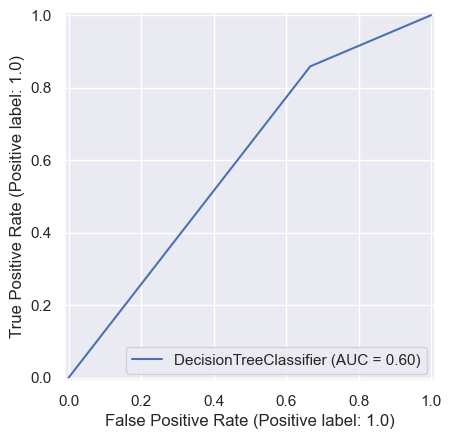

In [646]:
#display ROC Curve
RocCurveDisplay.from_estimator(dtc,X_test_final,y_test)

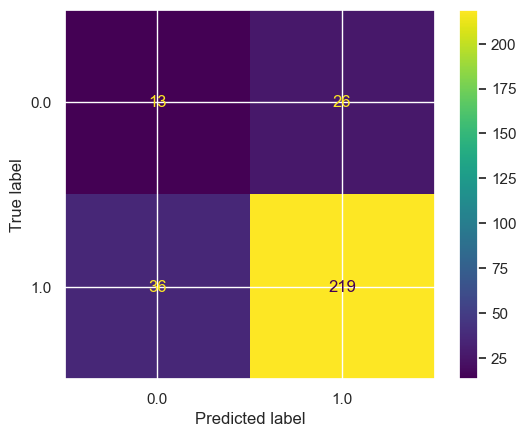

In [647]:
#display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(dtc,X_test_final,y_test)

### 5. Random Forest

In [651]:
#Initialize and fit the model
rfc = RandomForestClassifier()
rfc.fit(X_train_final,y_train)

RandomForestClassifier()

In [652]:
#get predictions
y_fit = rfc.predict(X_train_final)
y_pred = rfc.predict(X_test_final)

In [653]:
#Evaluate the Model
train_perf_classifier['Random Forest'] = eval_metrics(y_train,y_fit)
test_perf_classifier['Random Forest'] = eval_metrics(y_test,y_pred)

In [654]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,0.999,NaN,NaN,NaN,NaN
AUC_ROC,0.661,0.622,0.654,1.0,0.997,NaN,NaN,NaN,NaN
PrecisionScore,0.881,0.868,0.877,1.0,0.999,NaN,NaN,NaN,NaN
RecallScore,0.973,0.981,0.999,1.0,1.000,NaN,NaN,NaN,NaN
F1_Score,0.925,0.921,0.934,1.0,0.999,NaN,NaN,NaN,NaN


In [655]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.789,0.874,NaN,NaN,NaN,NaN
AUC_ROC,0.645,0.521,0.577,0.596,0.537,NaN,NaN,NaN,NaN
PrecisionScore,0.904,0.872,0.885,0.894,0.876,NaN,NaN,NaN,NaN
RecallScore,0.957,0.965,1.000,0.859,0.996,NaN,NaN,NaN,NaN
F1_Score,0.930,0.916,0.939,0.876,0.932,NaN,NaN,NaN,NaN


In [656]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.08      0.14        39
         1.0       0.88      1.00      0.93       255

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



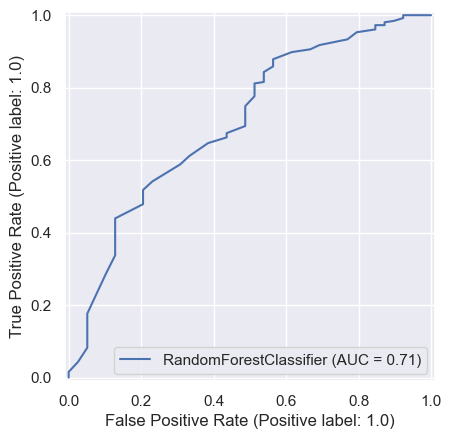

In [657]:
#display ROC Curve
RocCurveDisplay.from_estimator(rfc,X_test_final,y_test)

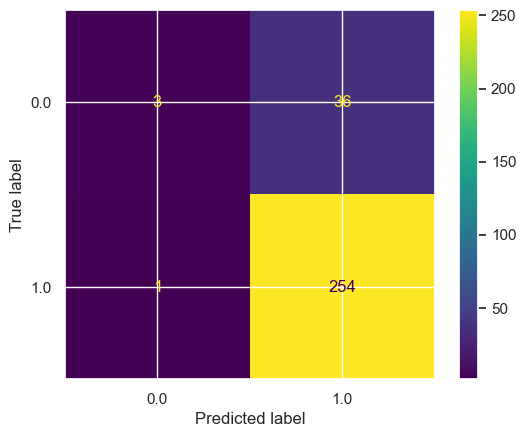

In [658]:
#display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rfc,X_test_final,y_test)

### 6. AdaBoost

In [662]:
#Initialize and fit the model
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_final,y_train)

C:\Users\kharb\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [663]:
#get predictions
y_fit = adaboost.predict(X_train_final)
y_pred = adaboost.predict(X_test_final)

In [664]:
#Evaluate the Model
train_perf_classifier['AdaBoost'] = eval_metrics(y_train,y_fit)
test_perf_classifier['AdaBoost'] = eval_metrics(y_test,y_pred)

In [665]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,0.999,0.884,NaN,NaN,NaN
AUC_ROC,0.661,0.622,0.654,1.0,0.997,0.713,NaN,NaN,NaN
PrecisionScore,0.881,0.868,0.877,1.0,0.999,0.898,NaN,NaN,NaN
RecallScore,0.973,0.981,0.999,1.0,1.000,0.971,NaN,NaN,NaN
F1_Score,0.925,0.921,0.934,1.0,0.999,0.933,NaN,NaN,NaN


In [666]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.789,0.874,0.864,NaN,NaN,NaN
AUC_ROC,0.645,0.521,0.577,0.596,0.537,0.628,NaN,NaN,NaN
PrecisionScore,0.904,0.872,0.885,0.894,0.876,0.900,NaN,NaN,NaN
RecallScore,0.957,0.965,1.000,0.859,0.996,0.949,NaN,NaN,NaN
F1_Score,0.930,0.916,0.939,0.876,0.932,0.924,NaN,NaN,NaN


In [667]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.48      0.31      0.38        39
         1.0       0.90      0.95      0.92       255

    accuracy                           0.86       294
   macro avg       0.69      0.63      0.65       294
weighted avg       0.84      0.86      0.85       294



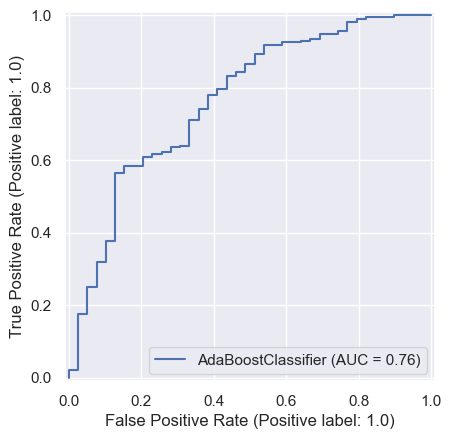

In [668]:
#display ROC Curve
RocCurveDisplay.from_estimator(adaboost,X_test_final,y_test)

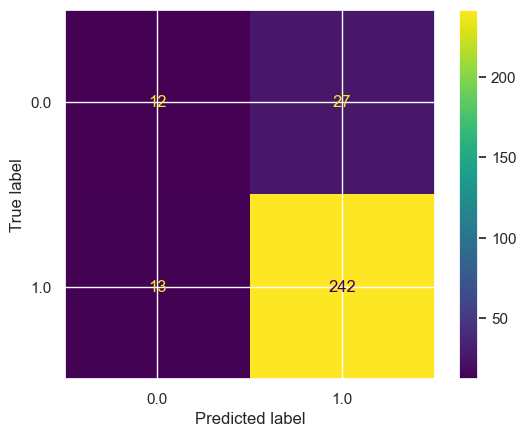

In [669]:
#display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(adaboost,X_test_final,y_test)

### 7. Gradient Boost

In [673]:
#Initialize and fit the model
gradientboost = GradientBoostingClassifier()
gradientboost.fit(X_train_final,y_train)

GradientBoostingClassifier()

In [674]:
#get predictions
y_fit = gradientboost.predict(X_train_final)
y_pred = gradientboost.predict(X_test_final)

In [675]:
#Evaluate the Model
train_perf_classifier['Gradient Boost'] = eval_metrics(y_train,y_fit)
test_perf_classifier['Gradient Boost'] = eval_metrics(y_test,y_pred)

In [676]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,0.999,0.884,0.938,NaN,NaN
AUC_ROC,0.661,0.622,0.654,1.0,0.997,0.713,0.818,NaN,NaN
PrecisionScore,0.881,0.868,0.877,1.0,0.999,0.898,0.931,NaN,NaN
RecallScore,0.973,0.981,0.999,1.0,1.000,0.971,0.999,NaN,NaN
F1_Score,0.925,0.921,0.934,1.0,0.999,0.933,0.964,NaN,NaN


In [677]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.789,0.874,0.864,0.874,NaN,NaN
AUC_ROC,0.645,0.521,0.577,0.596,0.537,0.628,0.602,NaN,NaN
PrecisionScore,0.904,0.872,0.885,0.894,0.876,0.900,0.892,NaN,NaN
RecallScore,0.957,0.965,1.000,0.859,0.996,0.949,0.973,NaN,NaN
F1_Score,0.930,0.916,0.939,0.876,0.932,0.924,0.931,NaN,NaN


In [678]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.23      0.33        39
         1.0       0.89      0.97      0.93       255

    accuracy                           0.87       294
   macro avg       0.73      0.60      0.63       294
weighted avg       0.85      0.87      0.85       294



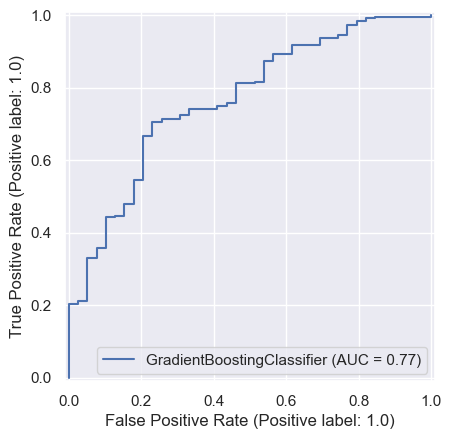

In [679]:
#display ROC Curve
RocCurveDisplay.from_estimator(gradientboost,X_test_final,y_test)

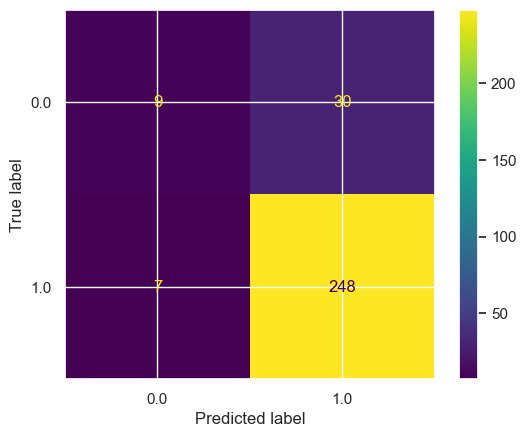

In [680]:
#display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(gradientboost,X_test_final,y_test)

### 8. XGBoost

In [684]:
#Initialize and fit the model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [685]:
#get predictions
y_fit = xgb.predict(X_train_final)
y_predict = xgb.predict(X_test_final)

In [686]:
#Evaluate the Model
train_perf_classifier['XGBoost'] = eval_metrics(y_train,y_fit)
test_perf_classifier['XGBoost'] = eval_metrics(y_test,y_pred)

In [687]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,0.999,0.884,0.938,1.0,NaN
AUC_ROC,0.661,0.622,0.654,1.0,0.997,0.713,0.818,1.0,NaN
PrecisionScore,0.881,0.868,0.877,1.0,0.999,0.898,0.931,1.0,NaN
RecallScore,0.973,0.981,0.999,1.0,1.000,0.971,0.999,1.0,NaN
F1_Score,0.925,0.921,0.934,1.0,0.999,0.933,0.964,1.0,NaN


In [688]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.789,0.874,0.864,0.874,0.874,NaN
AUC_ROC,0.645,0.521,0.577,0.596,0.537,0.628,0.602,0.602,NaN
PrecisionScore,0.904,0.872,0.885,0.894,0.876,0.900,0.892,0.892,NaN
RecallScore,0.957,0.965,1.000,0.859,0.996,0.949,0.973,0.973,NaN
F1_Score,0.930,0.916,0.939,0.876,0.932,0.924,0.931,0.931,NaN


In [689]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.23      0.33        39
         1.0       0.89      0.97      0.93       255

    accuracy                           0.87       294
   macro avg       0.73      0.60      0.63       294
weighted avg       0.85      0.87      0.85       294



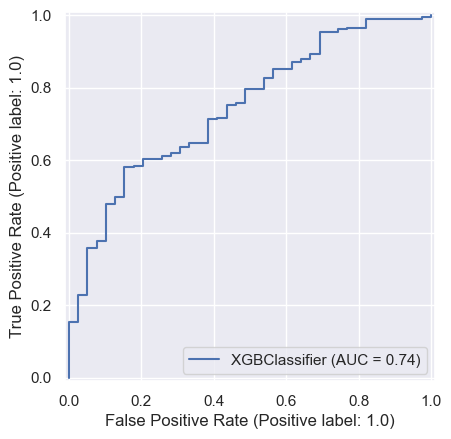

In [690]:
#display ROC Curve
RocCurveDisplay.from_estimator(xgb,X_test_final,y_test)

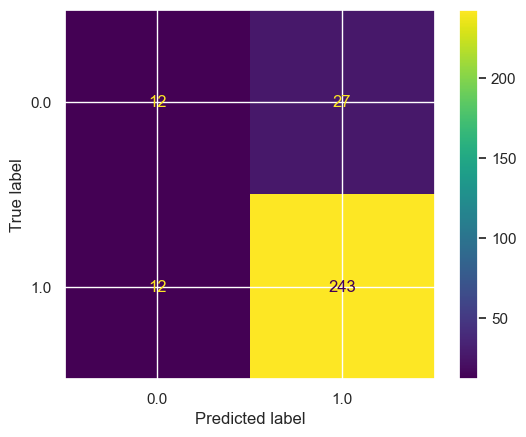

In [691]:
#display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb,X_test_final,y_test)

### 9. LightGBM

In [695]:
#Initialize and fit the model
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train_final,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 978, number of negative: 198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.831633 -> initscore=1.597243
[LightGBM] [Info] Start training from score 1.597243


LGBMClassifier()

In [696]:
y_fit = lgb.predict(X_train_final)
y_pred = lgb.predict(X_test_final)

In [697]:
train_perf_classifier['LightGBM'] = eval_metrics(y_train,y_fit)
test_perf_classifier['LightGBM'] = eval_metrics(y_test,y_pred)

In [698]:
train_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.868,0.860,0.883,1.0,0.999,0.884,0.938,1.0,1.0
AUC_ROC,0.661,0.622,0.654,1.0,0.997,0.713,0.818,1.0,1.0
PrecisionScore,0.881,0.868,0.877,1.0,0.999,0.898,0.931,1.0,1.0
RecallScore,0.973,0.981,0.999,1.0,1.000,0.971,0.999,1.0,1.0
F1_Score,0.925,0.921,0.934,1.0,0.999,0.933,0.964,1.0,1.0


In [699]:
test_perf_classifier

,Logistic Reg,KNN,SVM,Decision Tree,Random Forest,AdaBoost,Gradient Boost,XGBoost,LightGBM
Accuracy,0.874,0.847,0.888,0.789,0.874,0.864,0.874,0.874,0.871
AUC_ROC,0.645,0.521,0.577,0.596,0.537,0.628,0.602,0.602,0.589
PrecisionScore,0.904,0.872,0.885,0.894,0.876,0.900,0.892,0.892,0.889
RecallScore,0.957,0.965,1.000,0.859,0.996,0.949,0.973,0.973,0.973
F1_Score,0.930,0.916,0.939,0.876,0.932,0.924,0.931,0.931,0.929


In [700]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.21      0.30        39
         1.0       0.89      0.97      0.93       255

    accuracy                           0.87       294
   macro avg       0.71      0.59      0.61       294
weighted avg       0.84      0.87      0.84       294



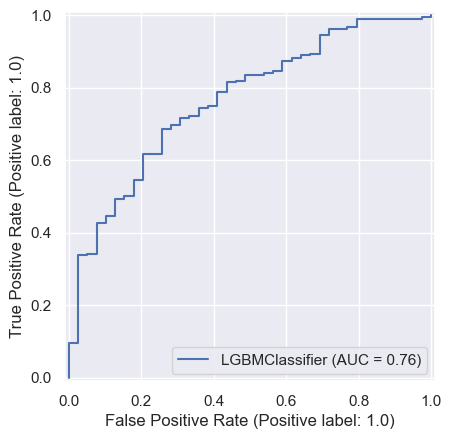

In [701]:
#display ROC Curve
RocCurveDisplay.from_estimator(lgb,X_test_final,y_test)

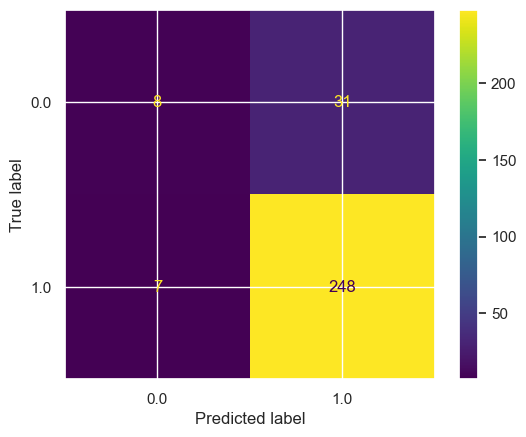

In [702]:
#display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lgb,X_test_final,y_test)

## HyperParameter Tuning - XGBoost

In [708]:
import random

In [709]:
#Initialize evaluation matrix for hyperparameters

iterations = ['XGB1','XGB2','XGB3','XGB4']
eval_metrics2 = ['Accuracy','AUC_ROC','PrecisionScore','RecallScore','F1_Score']

train_tuning_df = pd.DataFrame(columns = iterations, index = eval_metrics2)
test_tuning_df = pd.DataFrame(columns = iterations, index = eval_metrics2)

In [710]:
# initialize the model
xgb1 = XGBClassifier(n_estimators =10, random_state=0)
xgb1.fit(X_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [711]:
#Get predictions
y_fit= xgb1.predict(X_train_final)
y_pred = xgb1.predict(X_test_final)

In [712]:
#Evaluate the Model
train_tuning_df['XGB1'] = eval_metrics(y_train,y_fit)
test_tuning_df['XGB1'] = eval_metrics(y_test,y_pred)

In [713]:
train_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.946,NaN,NaN,NaN
AUC_ROC,0.843,NaN,NaN,NaN
PrecisionScore,0.940,NaN,NaN,NaN
RecallScore,0.999,NaN,NaN,NaN
F1_Score,0.969,NaN,NaN,NaN


In [714]:
test_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.847,NaN,NaN,NaN
AUC_ROC,0.543,NaN,NaN,NaN
PrecisionScore,0.878,NaN,NaN,NaN
RecallScore,0.957,NaN,NaN,NaN
F1_Score,0.916,NaN,NaN,NaN


Text(0.5, 1.0, 'Feature Importances')

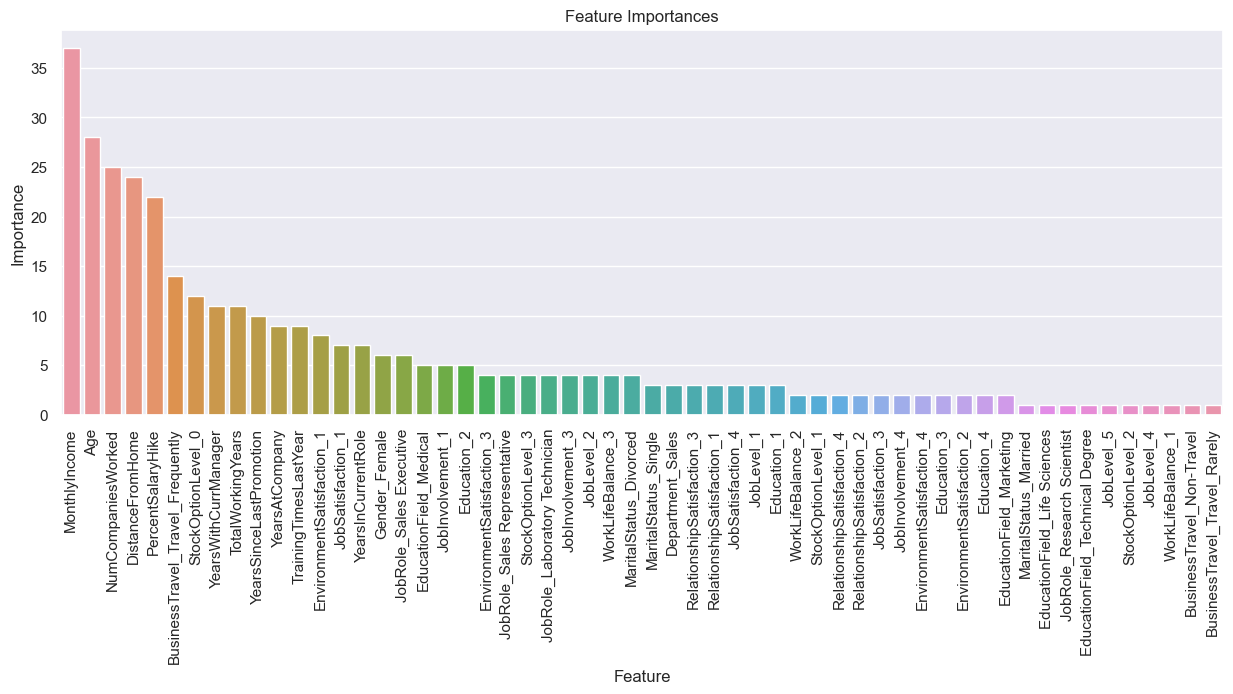

In [715]:
#create dataframe of feature importances and plot the features

feature_importances = pd.DataFrame(xgb1.get_booster().get_fscore(), index = ['Importance']).transpose().sort_values(ascending = False,by='Importance').reset_index()
feature_importances = feature_importances.rename(columns={'index':'Feature'})

plt.figure(figsize=(15,5))
ax = sns.barplot(data=feature_importances, y="Importance", x = "Feature")
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [716]:
#hyperparameter tuning ('max_depth','min_child_weight') iteration 1
param_test1 = { 'max_depth': range(1,12,2),
                'min_child_weight': range(1,10,2)
              }

gsearch1 = GridSearchCV(estimator=XGBClassifier(n_estimators=10, learning_rate = 0.3,gamma = 0 , 
                                                    colsample_bytree =1, subsample=1,objective= 'binary:logistic',
                                                   nthread=4, scale_pos_weight=1,
                                                   max_depth=5 , min_child_weight=2 ),
                        param_grid=param_test1, scoring='roc_auc', n_jobs=4, cv = 5)

gsearch1.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_child_weight': range(1, 10, 2)},
             scoring='roc_auc')

In [717]:
gsearch1.cv_results_

{'mean_fit_time': array([0.04131923, 0.03158641, 0.03837495, 0.03889804, 0.03344212,
        0.04182725, 0.04057679, 0.04303393, 0.06153727, 0.05859489,
        0.046735  , 0.05000529, 0.0480092 , 0.04856114, 0.04059944,
        0.06608367, 0.05638804, 0.04961338, 0.05311465, 0.04704823,
        0.07872872, 0.06168885, 0.06127229, 0.05885139, 0.05210934,
        0.07916021, 0.06467338, 0.05828576, 0.05352778, 0.04035244]),
 'std_fit_time': array([0.00493889, 0.00232818, 0.005566  , 0.0054332 , 0.00415498,
        0.01132058, 0.0069607 , 0.00593433, 0.0230948 , 0.01822   ,
        0.00175478, 0.00865731, 0.00519173, 0.00343716, 0.00578241,
        0.00706725, 0.00626076, 0.00458744, 0.00811086, 0.00633317,
        0.00714013, 0.00751608, 0.00632869, 0.00333324, 0.00320327,
        0.00602407, 0.00298615, 0.00558978, 0.0055449 , 0.00520111]),
 'mean_score_time': array([0.00913606, 0.01514058, 0.00307598, 0.01001344, 0.00613151,
        0.01437068, 0.0164618 , 0.00613146, 0.00646324, 0.00

In [718]:
 gsearch1.best_params_

{'max_depth': 5, 'min_child_weight': 3}

In [719]:
gsearch1.best_score_

0.7657459445316588

In [720]:
#hyperparameter tuning ('max_depth','min_child_weight') iteration 2

param_test2 = { 'max_depth': [4,5,6],
                'min_child_weight': [2,3,4]
              }

gsearch2 = GridSearchCV(estimator=XGBClassifier(n_estimators=10, learning_rate = 0.3,gamma = 0 , 
                                                    colsample_bytree =1, subsample=1,objective= 'binary:logistic',
                                                   nthread=4, scale_pos_weight=1,
                                                   max_depth=5 , min_child_weight=2 ),
                        param_grid=param_test2, scoring='roc_auc', n_jobs=-1, cv = 5)

gsearch2.fit(X_train_final,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [2, 3, 4]},
             scoring='roc_auc')

In [721]:
gsearch2.cv_results_

{'mean_fit_time': array([0.11841731, 0.13143229, 0.10585408, 0.10701737, 0.12157731,
        0.12442441, 0.15379581, 0.12025895, 0.09596219]),
 'std_fit_time': array([0.01220172, 0.01770393, 0.00872178, 0.0119601 , 0.02346995,
        0.00560262, 0.01265099, 0.01048574, 0.00866664]),
 'mean_score_time': array([0.04714313, 0.03083882, 0.01826849, 0.00988436, 0.01067643,
        0.01576409, 0.01487479, 0.01391912, 0.01083603]),
 'std_score_time': array([0.04107394, 0.02499651, 0.00556702, 0.00812322, 0.00639836,
        0.00118911, 0.01006225, 0.00851842, 0.00601284]),
 'param_max_depth': masked_array(data=[4, 4, 4, 5, 5, 5, 6, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'param_min_child_weight': masked_array(data=[2, 3, 4, 2, 3, 4, 2, 3, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'params': [{'max_dep

In [722]:
gsearch2.best_params_

{'max_depth': 5, 'min_child_weight': 3}

In [723]:
gsearch2.best_score_

0.7657459445316588

In [724]:
#hyperparameter tuning ('gamma') iteration 3

param_test3 = {'gamma':[i/10 for i in range(0,5)] }

gsearch3 = GridSearchCV(estimator=XGBClassifier(n_estimators=10, learning_rate = 0.3,gamma = 0 , 
                                                    colsample_bytree =1, subsample=1,objective= 'binary:logistic',
                                                   nthread=4, scale_pos_weight=1,
                                                   max_depth=5 , min_child_weight=3 ),
                        param_grid=param_test3, scoring='roc_auc', n_jobs=-1, cv = 5)

gsearch3.fit(X_train_final,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='roc_auc')

In [725]:
gsearch3.cv_results_

{'mean_fit_time': array([0.09216852, 0.10228753, 0.09116006, 0.09803567, 0.08292665]),
 'std_fit_time': array([0.00795761, 0.02109394, 0.00790218, 0.01149642, 0.02095471]),
 'mean_score_time': array([0.01603594, 0.01280489, 0.0177578 , 0.00955491, 0.00843363]),
 'std_score_time': array([0.00051231, 0.00686672, 0.00660903, 0.00780828, 0.00804195]),
 'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'gamma': 0.0},
  {'gamma': 0.1},
  {'gamma': 0.2},
  {'gamma': 0.3},
  {'gamma': 0.4}],
 'split0_test_score': array([0.7869898 , 0.76581633, 0.76607143, 0.77366071, 0.77340561]),
 'split1_test_score': array([0.73914181, 0.73914181, 0.73914181, 0.73914181, 0.73914181]),
 'split2_test_score': array([0.73246991, 0.71206175, 0.71912611, 0.70983778, 0.70983778]),
 'split3_test_score': array([0.7999359, 0.7774359, 0.7625641, 0.7575641, 0.7575641]),
 'split4_test_score': array([0.77019231, 0.770

In [726]:
gsearch3.best_params_

{'gamma': 0.0}

In [727]:
gsearch3.best_score_

0.7657459445316588

In [728]:
# initialize model-2

xgb2= XGBClassifier(n_estimators=10, learning_rate = 0.3,gamma = 0 , 
                    colsample_bytree =1, subsample=1,objective= 'binary:logistic',
                    nthread=4, scale_pos_weight=1,
                    max_depth=5 , min_child_weight=3)

xgb2.fit(X_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [729]:
#Get predictions
y_fit = xgb2.predict(X_train_final)
y_pred = xgb2.predict(X_test_final)

In [730]:
#evaluate the model
train_tuning_df['XGB2'] = eval_metrics(y_train,y_fit)
test_tuning_df['XGB2'] = eval_metrics(y_test,y_pred)

In [731]:
train_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.946,0.912,NaN,NaN
AUC_ROC,0.843,0.743,NaN,NaN
PrecisionScore,0.940,0.906,NaN,NaN
RecallScore,0.999,0.997,NaN,NaN
F1_Score,0.969,0.949,NaN,NaN


In [732]:
test_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.847,0.850,NaN,NaN
AUC_ROC,0.543,0.555,NaN,NaN
PrecisionScore,0.878,0.881,NaN,NaN
RecallScore,0.957,0.957,NaN,NaN
F1_Score,0.916,0.917,NaN,NaN


Text(0.5, 1.0, 'Feature Importances')

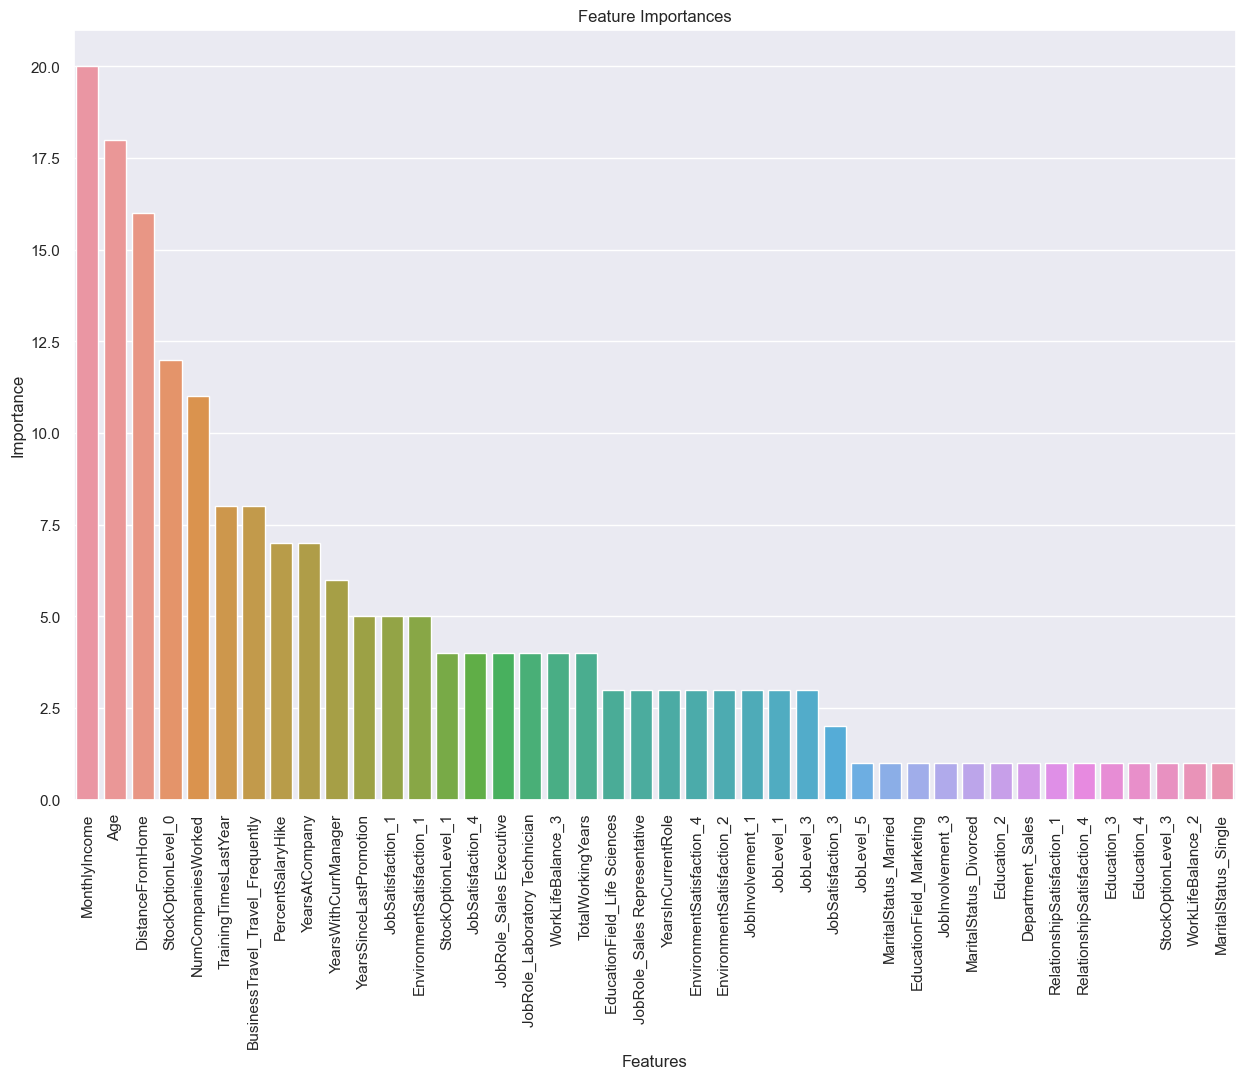

In [733]:
#create dataframe of feature importances and plot the features

feature_importances2 = pd.Series(xgb2.get_booster().get_fscore()).sort_values(ascending=False)
feature_importances2 = feature_importances2.to_frame().reset_index()
feature_importances2 = feature_importances2.rename(columns={'index':'Features',0:'Importance'})

plt.figure(figsize=(15,10))
ax = sns.barplot(data=feature_importances2,x='Features',y='Importance')
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [734]:
#Hyperparameter tuning ('colsample_bytree', 'subsample') Iteration 4

param_test4 = {'colsample_bytree':[i/10 for i in range(0,10)],
               'subsample':[i/10 for i in range(0,10)]}

gsearch4 = GridSearchCV(estimator=XGBClassifier(n_estimators=10, learning_rate = 0.3,gamma = 0 , 
                                                    colsample_bytree =1, subsample=1,objective= 'binary:logistic',
                                                   nthread=4, scale_pos_weight=1,
                                                   max_depth=5 , min_child_weight=3 ),
                        param_grid=param_test4, scoring='roc_auc', n_jobs=-1, cv = 5)

gsearch4.fit(X_train_final,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                              0.7, 0.8, 0.9],
                         'subsample': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                       0.8, 0.9]},
             scoring='roc_auc')

In [735]:
gsearch4.cv_results_

{'mean_fit_time': array([0.04975262, 0.07010341, 0.09374752, 0.08872094, 0.08074417,
        0.07712274, 0.06526775, 0.06354127, 0.04956737, 0.08921957,
        0.06553578, 0.1015233 , 0.11847072, 0.0916914 , 0.07794094,
        0.06777959, 0.06695762, 0.06265011, 0.06974916, 0.0822763 ,
        0.03255243, 0.05884676, 0.07285595, 0.06769638, 0.07272983,
        0.06566639, 0.06905975, 0.07938781, 0.08926497, 0.10002952,
        0.04416046, 0.06898355, 0.0975162 , 0.12008138, 0.11772003,
        0.10205874, 0.10290313, 0.10604396, 0.11814885, 0.12065802,
        0.04000545, 0.07632604, 0.10181708, 0.09953151, 0.1028574 ,
        0.10417457, 0.10858822, 0.11119933, 0.12517128, 0.15178127,
        0.04309659, 0.08744268, 0.10284476, 0.11082306, 0.10774956,
        0.10701032, 0.11477499, 0.10938926, 0.14234328, 0.15468378,
        0.05890388, 0.09478807, 0.09922504, 0.09866905, 0.11275496,
        0.11005344, 0.11397495, 0.12124867, 0.13198657, 0.15523772,
        0.04915996, 0.09129739,

In [736]:
gsearch4.best_params_

{'colsample_bytree': 0.9, 'subsample': 0.8}

In [737]:
gsearch4.best_score_

0.7565791470434328

In [738]:
#Hyperparameter tuning ('colsample_bytree', 'subsample') Iteration 5

param_grid5 = {'colsample_bytree':[i/100 for i in range(83,97)],
               'subsample':[i/100 for i in range(75,90)]
              }

gsearch5 = GridSearchCV(estimator=XGBClassifier(n_estimators=10,max_depth=5,learning_rate=0.3,gamma=0,
                                               min_child_weight=3, colsample_bytree=0.9,subsample=0.8,
                                               objective= 'binary:logistic',nthread=4, scale_pos_weight=1),
                        n_jobs=-1,scoring='roc_auc',cv=5,param_grid=param_grid5)



gsearch5.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.9,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_b...
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.83, 0.84, 0.85, 0.86, 0.87,
                                              0.88, 0.89, 0.9, 0.91, 0.92, 0.93,
                                              0.94, 0.95, 0.96],
                         'subsample': [0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81,
                                       0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
                                       0.89]},
             scoring='roc_auc')

In [739]:
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.13053503, 0.12006359, 0.1048141 , 0.11096849, 0.1205215 ,
         0.10966306, 0.11523333, 0.10796456, 0.11710372, 0.11460509,
         0.1089756 , 0.12173591, 0.116572  , 0.1062448 , 0.11707244,
         0.11291609, 0.11926098, 0.13028288, 0.1390142 , 0.13972688,
         0.14191408, 0.14259305, 0.14673548, 0.12671967, 0.13854799,
         0.14203143, 0.13917027, 0.1478034 , 0.14629989, 0.13497024,
         0.14014106, 0.13368769, 0.14255319, 0.13653302, 0.12766476,
         0.13381162, 0.13089881, 0.13044763, 0.12450919, 0.12420225,
         0.12508869, 0.12749424, 0.16193461, 0.18130383, 0.1762342 ,
         0.13855057, 0.14735265, 0.13364749, 0.1402761 , 0.13255067,
         0.13930836, 0.13923149, 0.13808017, 0.1385643 , 0.13732228,
         0.14133949, 0.13454652, 0.13899574, 0.13267241, 0.13259492,
         0.12530293, 0.12876186, 0.12338324, 0.12260752, 0.12531238,
         0.14080591, 0.14297509, 0.14468527, 0.15188947, 0.14720883,
         0.158383

In [740]:
#hyperparameter tuning ('n_estimators','learning_rate') iteration 6

param_grid6 = {'n_estimators':[1,10,100,1000],
              'learning_rate':[i/10 for i in range(1,10)]}

gsearch6 = GridSearchCV(estimator=XGBClassifier(n_estimators=10,max_depth=5,learning_rate=0.3,gamma=0,
                                               min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                                               objective= 'binary:logistic',nthread=4, scale_pos_weight=1),
                        n_jobs=-1,scoring='roc_auc',cv=5,param_grid=param_grid6)



gsearch6.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.86,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9],
                         'n_estimators': [1, 10, 100, 1000]},
             scoring='roc_auc')

In [741]:
gsearch6.cv_results_

{'mean_fit_time': array([ 0.0491818 ,  0.17222881,  0.7816349 ,  7.82967806,  0.04120836,
         0.11187487,  1.08492293,  6.88395157,  0.0367929 ,  0.11670928,
         0.89523787,  6.36555848,  0.03458791,  0.12267594,  0.93733487,
         6.27178154,  0.03321271,  0.13430772,  0.98394794, 10.5131846 ,
         0.04023733,  0.11716256,  1.5361877 , 12.55474987,  0.07422976,
         0.29791117,  2.72790017,  6.34108357,  0.04119701,  0.15499878,
         0.95968623,  5.74415045,  0.03350635,  0.18102269,  1.03192587,
         3.38366842]),
 'std_fit_time': array([0.00693195, 0.02595278, 0.03179764, 0.17114858, 0.00759931,
        0.01063657, 0.336415  , 0.196617  , 0.00447062, 0.00716717,
        0.02373961, 0.17523526, 0.00655657, 0.00917036, 0.04188929,
        0.09241315, 0.0027663 , 0.00941198, 0.06156652, 1.05310968,
        0.00828096, 0.00852766, 0.45139243, 1.27026648, 0.0106652 ,
        0.14805636, 1.38572208, 0.12425064, 0.00601996, 0.02275266,
        0.0615573 , 0.102

In [742]:
gsearch6.best_params_, gsearch6.best_score_

({'learning_rate': 0.3, 'n_estimators': 10}, 0.7688812140240712)

In [743]:
#hyperparameter tuning ('n_estimators','learning_rate') iteration 7

param_grid7 = {'n_estimators':[i*10 for i in range(1,10)],
              'learning_rate':[i/100 for i in range(25,35)]}

gsearch7 = GridSearchCV(estimator=XGBClassifier(n_estimators=10,max_depth=5,learning_rate=0.3,gamma=0,
                                               min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                                               objective= 'binary:logistic',nthread=4, scale_pos_weight=1),
                        n_jobs=-1,scoring='roc_auc',cv=5,param_grid=param_grid7)



gsearch7.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.86,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=10, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.25, 0.26, 0.27, 0.28, 0.29, 0.3,
                                           0.31, 0.32, 0.33, 0.34],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='roc_auc')

In [744]:
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([1.96768379e-01, 2.77671957e-01, 3.25638914e-01, 4.25967121e-01,
         5.50845480e-01, 6.53621578e-01, 6.35610771e-01, 7.18739223e-01,
         8.78020239e-01, 1.29062557e-01, 2.61606741e-01, 3.70628977e-01,
         4.01887560e-01, 4.70254898e-01, 5.60811901e-01, 7.40943575e-01,
         9.38555527e-01, 1.24491234e+00, 1.38360596e-01, 5.16819191e-01,
         1.48765659e+00, 5.55048180e-01, 4.17828178e-01, 5.63737726e-01,
         6.06380129e-01, 6.93890810e-01, 6.99411345e-01, 1.00951958e-01,
         1.89550161e-01, 3.64830208e-01, 3.74502039e-01, 4.09377623e-01,
         5.10205746e-01, 5.62640572e-01, 5.49661398e-01, 5.23563213e+00,
         1.15772724e-01, 1.85293698e+00, 3.94373559e+01, 6.00375485e+01,
         7.78213644e+01, 9.38047940e+01, 1.08199871e+02, 1.22404369e+02,
         9.56509144e+01, 1.65190018e+01, 7.92081099e+00, 9.06302547e-01,
         7.43052053e-01, 6.94331408e-01, 8.26454496e-01, 9.63882017e-01,
         1.08844185e+00, 1.3285210

In [745]:
#hyperparameter tuning ('n_estimators','reg_alpha','reg_lambda') iteration 8

param_grid8 = {'n_estimators':range(12,27),
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
              'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]}

gsearch8 = GridSearchCV(estimator=XGBClassifier(n_estimators=20,max_depth=5,learning_rate=0.3,gamma=0,
                                               min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                                               objective= 'binary:logistic',nthread=4, scale_pos_weight=1),
                        n_jobs=-1,scoring='roc_auc',cv=5,param_grid=param_grid8)



gsearch8.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.86,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=20, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'n_estimators': range(12, 27),
                         'reg_alpha': [1e-05, 0.01, 0.1, 1, 100],
                         'reg_lambda': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='roc_auc')

In [746]:
gsearch8.cv_results_

{'mean_fit_time': array([ 0.14171262,  0.126443  ,  0.1447475 ,  0.14458976,  0.1219614 ,
         0.16377392,  0.1442049 ,  0.14138012,  0.14974542,  0.1334868 ,
         0.14732599,  0.1430769 ,  0.15532651,  0.15701032,  0.12228971,
         0.17518873,  0.1898787 ,  0.17923746,  0.18974767,  0.17566795,
         0.13978124,  0.14980464,  0.15405331,  0.14366827,  0.13707576,
         0.1977129 ,  0.17481079,  0.1742363 ,  0.19376082,  0.16021285,
         0.19325643,  2.65567226,  5.31239953, 13.05530553, 13.47264009,
        19.11482425, 19.33583264, 20.30065041, 23.00484786, 18.00908761,
        22.46403193, 22.69033155, 22.34760361, 22.43149147, 18.54138427,
        11.92841368, 12.94323006, 11.46439247, 11.21358237, 11.02973452,
        24.56729708, 25.7984189 , 25.83672032,  8.87757473,  1.86020913,
         0.9164289 ,  0.85707688,  0.5229094 ,  0.48596849,  0.26485949,
         0.26859818,  0.2122592 ,  0.22102923,  0.2434866 ,  0.15827746,
         0.15898142,  0.14753022, 

In [747]:
 gsearch8.best_params_, gsearch8.best_score_

({'n_estimators': 20, 'reg_alpha': 1e-05, 'reg_lambda': 1}, 0.7810881737310309)

In [748]:
#hyperparameter tuning ('reg_lambda') iteration 9

param_grid9 = {'reg_lambda':[0.1,0.2,0.5,0.8,1,2,5,10]}

gsearch9 = GridSearchCV(estimator=XGBClassifier(n_estimators=20,max_depth=5,learning_rate=0.3,gamma=0,
                                               min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                                               objective= 'binary:logistic',nthread=4, scale_pos_weight=1,
                                               reg_alpha=1e-05,reg_lambda=1),
                        n_jobs=-1,scoring='roc_auc',cv=5,param_grid=param_grid9)



gsearch9.fit(X_train_final,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.86,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=20, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'reg_lambda': [0.1, 0.2, 0.5, 0.8, 1, 2, 5, 10]},
             scoring='roc_auc')

In [749]:
gsearch9.cv_results_

{'mean_fit_time': array([0.26092257, 0.22904282, 0.25268168, 0.25889525, 0.29475794,
        0.30716915, 0.37003388, 0.33042846]),
 'std_fit_time': array([0.02637498, 0.02536001, 0.01912974, 0.01392664, 0.02713502,
        0.02517455, 0.02599503, 0.04638383]),
 'mean_score_time': array([0.02436233, 0.01560664, 0.01820445, 0.02301283, 0.01135345,
        0.01661348, 0.01513233, 0.00780382]),
 'std_score_time': array([0.01020906, 0.00771598, 0.00482943, 0.00741457, 0.0029753 ,
        0.00770628, 0.00251038, 0.00523517]),
 'param_reg_lambda': masked_array(data=[0.1, 0.2, 0.5, 0.8, 1.0, 2.0, 5.0, 10.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'reg_lambda': 0.1},
  {'reg_lambda': 0.2},
  {'reg_lambda': 0.5},
  {'reg_lambda': 0.8},
  {'reg_lambda': 1},
  {'reg_lambda': 2},
  {'reg_lambda': 5},
  {'reg_lambda': 10}],
 'split0_test_score': array([0.71237245, 0.75114796, 0.70242347, 0.77308673, 0.78392857,
        0.7

In [750]:
 gsearch9.best_params_, gsearch9.best_score_

({'reg_lambda': 1}, 0.7810881737310309)

In [751]:
#initialize 3rd model

xgb3 = XGBClassifier(n_estimators=20,max_depth=5,learning_rate=0.3,gamma=0,
                     min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                     objective= 'binary:logistic',nthread=4, scale_pos_weight=1,
                     reg_alpha=1e-05,reg_lambda=1)
xgb3.fit(X_train_final,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.86, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [752]:
#get predictions
y_fit=xgb3.predict(X_train_final)
y_pred=xgb3.predict(X_test_final)

In [753]:
#Evaluate the metrics
train_tuning_df['XGB3'] =  eval_metrics(y_train,y_fit)
test_tuning_df['XGB3'] =  eval_metrics(y_test,y_pred)

In [754]:
train_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.946,0.912,0.930,NaN
AUC_ROC,0.843,0.743,0.805,NaN
PrecisionScore,0.940,0.906,0.927,NaN
RecallScore,0.999,0.997,0.994,NaN
F1_Score,0.969,0.949,0.960,NaN


In [755]:
test_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.847,0.850,0.867,NaN
AUC_ROC,0.543,0.555,0.609,NaN
PrecisionScore,0.878,0.881,0.894,NaN
RecallScore,0.957,0.957,0.961,NaN
F1_Score,0.916,0.917,0.926,NaN


Text(0.5, 1.0, 'Feature Importances')

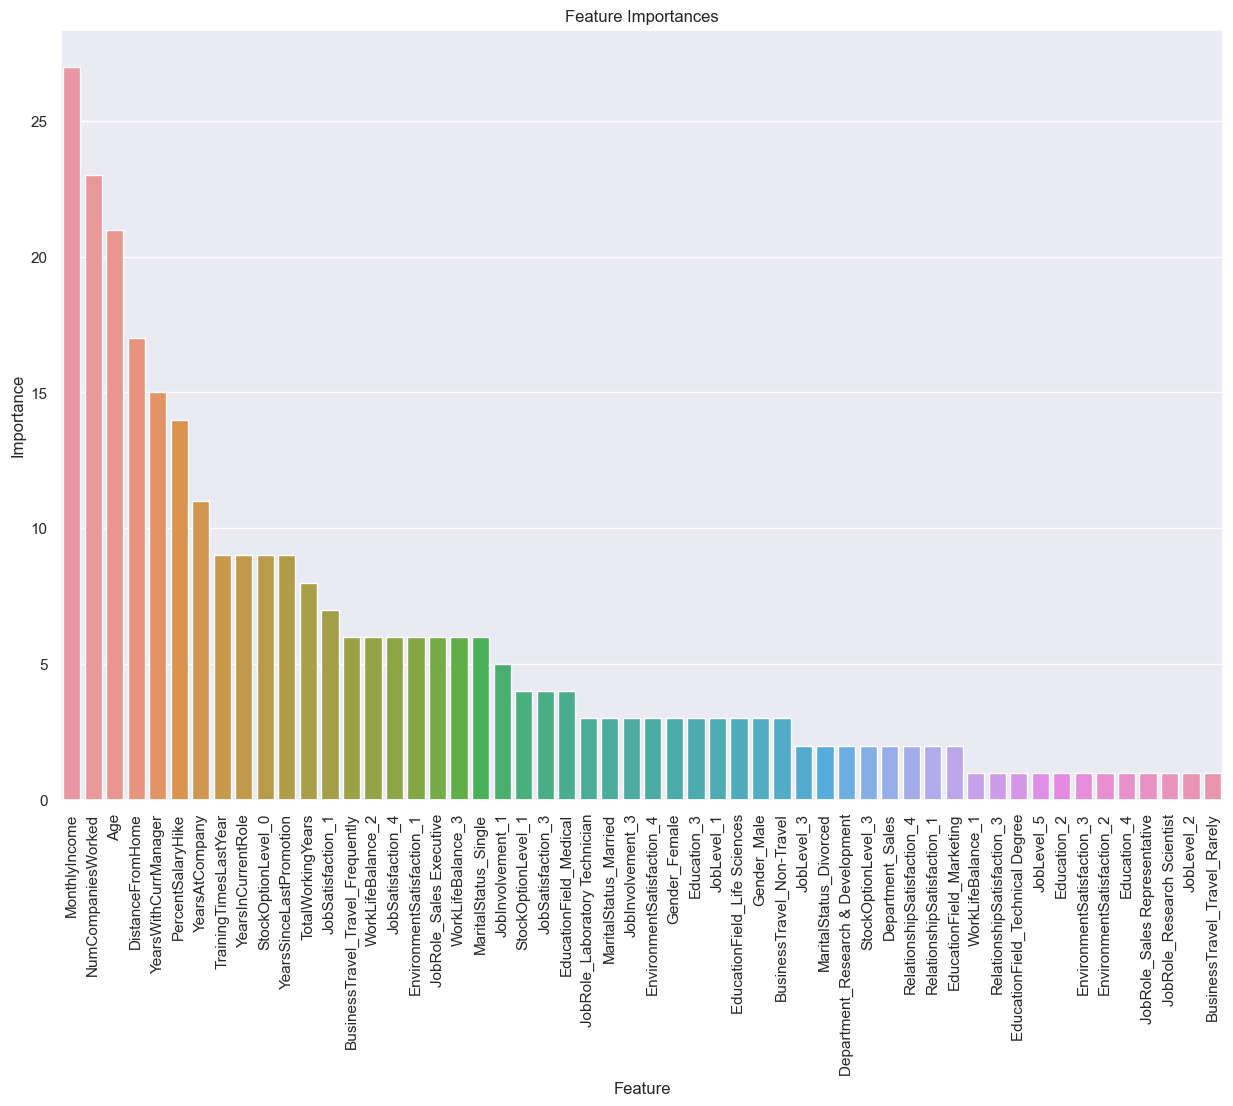

In [756]:
#create dataframe of feature importances and plot the features

feature_importances3 = pd.Series(xgb3.get_booster().get_fscore()).sort_values(ascending=False).reset_index()
feature_importances3 =feature_importances3.rename(columns={'index':'Feature',0:'Importance'})
feature_importances3

plt.figure(figsize=(15,10))
sns.barplot(data=feature_importances3,x='Feature',y='Importance')
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [757]:
#Remove features that don't have high feature importance
trim_features = feature_importances3.loc[:19,"Feature"].to_list()
trim_features

['MonthlyIncome',
 'NumCompaniesWorked',
 'Age',
 'DistanceFromHome',
 'YearsWithCurrManager',
 'PercentSalaryHike',
 'YearsAtCompany',
 'TrainingTimesLastYear',
 'YearsInCurrentRole',
 'StockOptionLevel_0',
 'YearsSinceLastPromotion',
 'TotalWorkingYears',
 'JobSatisfaction_1',
 'BusinessTravel_Travel_Frequently',
 'WorkLifeBalance_2',
 'JobSatisfaction_4',
 'EnvironmentSatisfaction_1',
 'JobRole_Sales Executive',
 'WorkLifeBalance_3',
 'MaritalStatus_Single']

In [758]:
#initialize 4th model

xgb4 = XGBClassifier(n_estimators=20,max_depth=5,learning_rate=0.3,gamma=0,
                     min_child_weight=3, colsample_bytree=0.86,subsample=0.83,
                     objective= 'binary:logistic',nthread=4, scale_pos_weight=1,
                     reg_alpha=1e-05,reg_lambda=1)
xgb4.fit(X_train_final[trim_features],y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.86, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [759]:
#get predictions
y_fit= xgb4.predict(X_train_final[trim_features])
y_pred = xgb4.predict(X_test_final[trim_features])

In [760]:
#Evaluate the metrics
train_tuning_df['XGB4'] = eval_metrics(y_train,y_fit)
test_tuning_df['XGB4'] = eval_metrics(y_test,y_pred)

Text(0.5, 1.0, 'Feature Importances')

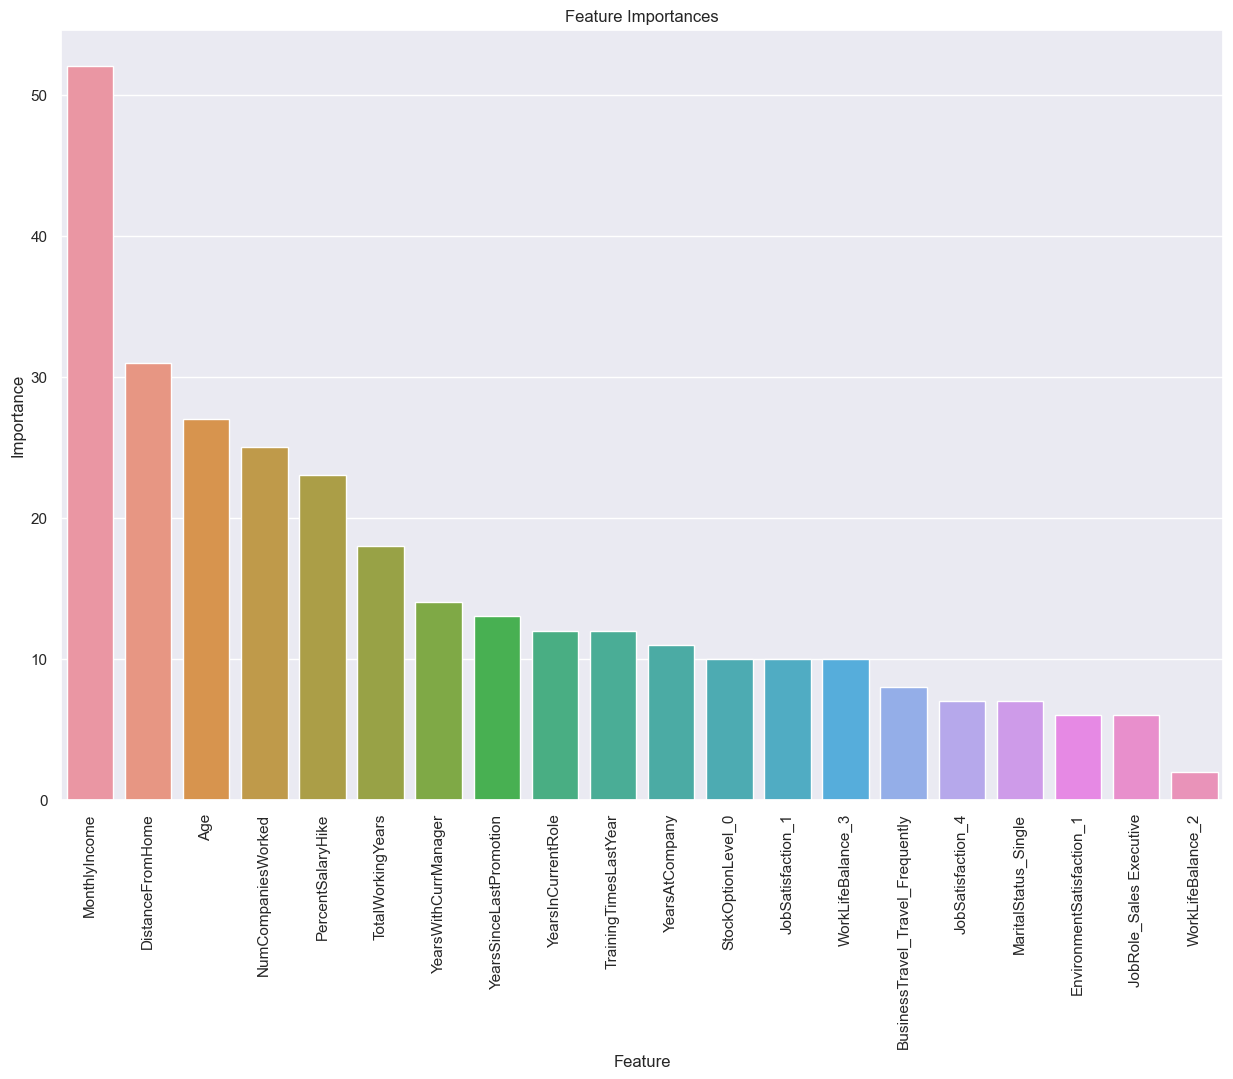

In [761]:
#create dataframe of feature importances and plot the features

feature_importances4 = pd.Series(xgb4.get_booster().get_fscore()).sort_values(ascending=False).reset_index()
feature_importances4 = feature_importances4.rename(columns={'index':'Feature',0:'Importance'})
feature_importances4

plt.figure(figsize=(15,10))
sns.barplot(data=feature_importances4,x='Feature',y='Importance')
plt.xticks(rotation=90)
plt.title("Feature Importances")

In [762]:
train_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.946,0.912,0.930,0.920
AUC_ROC,0.843,0.743,0.805,0.781
PrecisionScore,0.940,0.906,0.927,0.919
RecallScore,0.999,0.997,0.994,0.991
F1_Score,0.969,0.949,0.960,0.954


In [763]:
test_tuning_df

,XGB1,XGB2,XGB3,XGB4
Accuracy,0.847,0.850,0.867,0.857
AUC_ROC,0.543,0.555,0.609,0.581
PrecisionScore,0.878,0.881,0.894,0.887
RecallScore,0.957,0.957,0.961,0.957
F1_Score,0.916,0.917,0.926,0.921


## SHAP for Model Interpretability

In [767]:
!pip install shap
!pip install numba --upgrade

import shap

### 1. Waterfall Plot

In [769]:
#Create Tree Explainer object that can calculate SHAP values
explainer = shap.TreeExplainer(xgb4)

In [770]:
#get shap values
shap_values = explainer(X_test_final[trim_features])


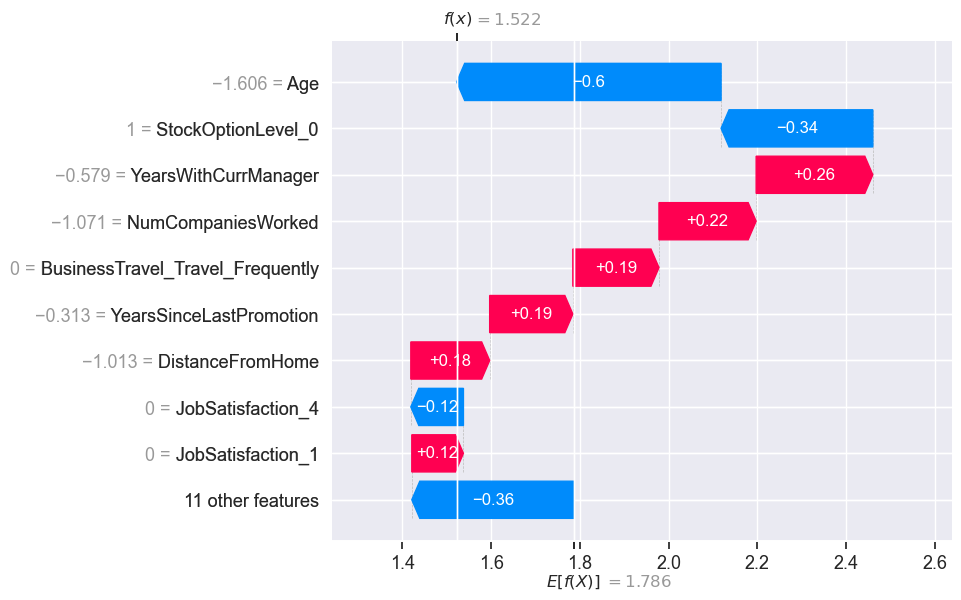

In [771]:
#waterfall plot
idx = 14
# explanation = shap.Explanation(shap_values.values[:,:,1], shap_values.base_values[:,1], feature_names=X_test_final.columns, data = X_test_final.values)
shap.plots.waterfall(shap_values[idx])

### 2. Beeswarm Plot

<Axes: xlabel='SHAP value (impact on model output)'>

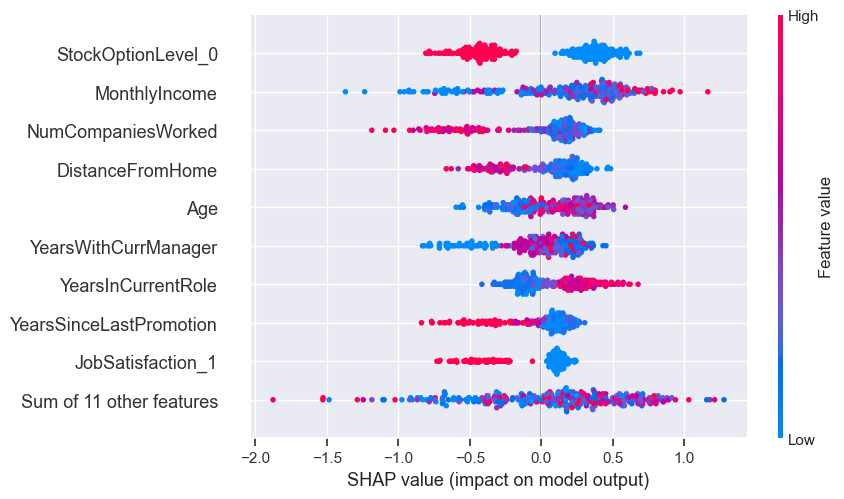

In [773]:
#display beeswarm plot
shap.plots.beeswarm(shap_values,show=False)

### 3. Summary Plot

In [775]:
shap_interaction = explainer.shap_interaction_values(X_test_final[trim_features])

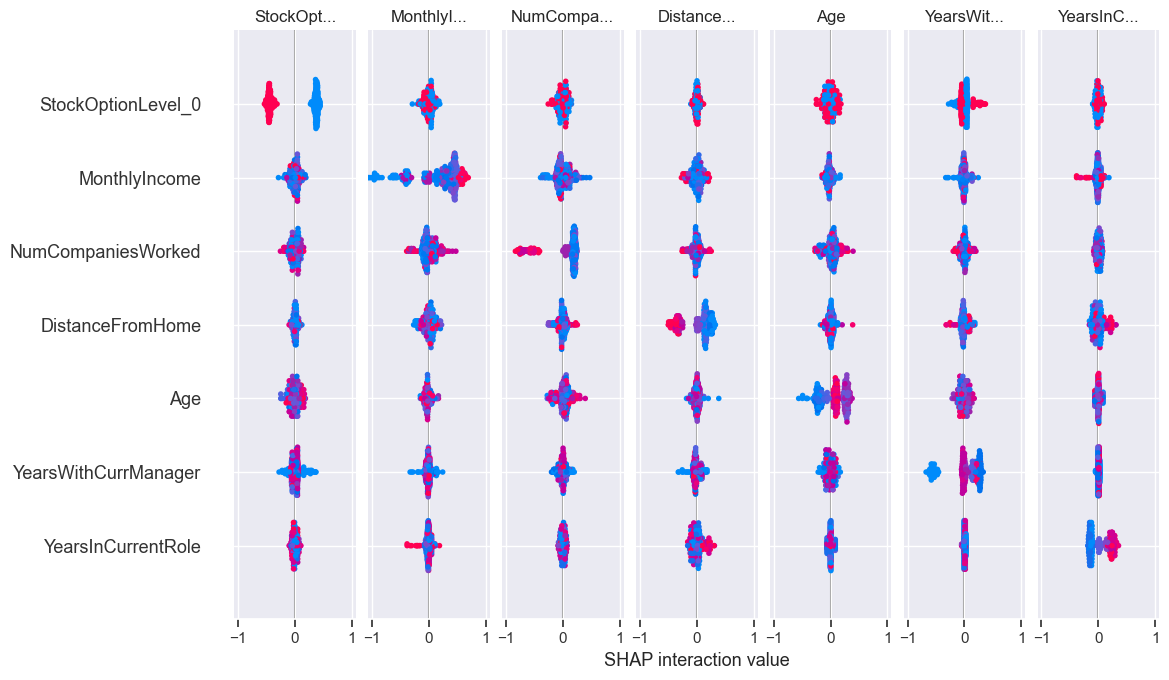

In [776]:
#Display summary plot
shap.summary_plot(shap_interaction, X_test_final[trim_features], show=False)

In [ ]:
#End of code